# Análisis Exploratorio de Datos: Exploración de Actividad y Sueño (Datos Sintéticos)
Este notebook analiza patrones de actividad física y sueño que podrían ser indicadores tempranos de deterioro cognitivo. A demás nos permitirá explorar los datos sintéticos de actividad física y sueño, que podrían ser indicadores tempranos de deterioro cognitivo. 

El archivo que se analizará se llama: synthetic_activity_sleep_data.csv.

## Objetivos
1. ✅ Identificar patrones de actividad física y sueño que diferencien entre pacientes con y sin Alzheimer 
2. ✅ Evaluar la correlación entre variables de sueño y actividad con el diagnóstico de deterioro cognitivo
3. ✅ Detectar variaciones temporales (diarias y estacionales) en los patrones de actividad y sueño
4. ✅ Determinar qué métricas de actividad y sueño tienen mayor potencial como biomarcadores digitales 
5. ✅ Establecer valores de referencia para las diferentes variables según grupos de edad y diagnóstico
6. ✅ Identificar características derivadas que maximicen la detección temprana de cambios cognitivos

***

## Importación de librerías necesarias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot

## Inicio

In [4]:
print("Análisis Exploratorio: Datos Sintéticos de Actividad y Sueño")
print("Proyecto de Detección Temprana de Alzheimer")
print("Fecha: ", pd.Timestamp.now().strftime("%Y-%m-%d"))

Análisis Exploratorio: Datos Sintéticos de Actividad y Sueño
Proyecto de Detección Temprana de Alzheimer
Fecha:  2025-04-11


### Configuración de visualización y Más

In [46]:
# Ignorar advertencias para una visualización más limpia
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


## Carga y Vista Previa de Datos 

In [31]:
# Ruta a los archivos
data_path = "../data/raw/synthetic/"
synthetic_path = os.path.join(data_path, "synthetic_activity_sleep_data.csv")

# Cargar archivos
try:
    synthetic_df = pd.read_csv(synthetic_path)
    print(f"✓ Archivo Synthetic cargado: {synthetic_path}")
    print(f"  - Dimensiones: {synthetic_df.shape[0]} filas, {synthetic_df.shape[1]} columnas")
except FileNotFoundError:
    print(f"✗ Archivo no encontrado: {synthetic_path}")
    synthetic_df = None


✓ Archivo Synthetic cargado: ../data/raw/synthetic/synthetic_activity_sleep_data.csv
  - Dimensiones: 54000 filas, 13 columnas


### Vista Previa

In [19]:
# Primeras filas del dataframe
display(synthetic_df.head())

subject_id        date diagnosis   age gender  steps  activity_minutes  \
0      S_001  2023-01-01   Control  53.9      M   7340             137.5   
1      S_001  2023-01-02   Control  53.9      M   4015             142.9   
2      S_001  2023-01-03   Control  53.9      M   6925             236.4   
3      S_001  2023-01-04   Control  53.9      M   7972             231.6   
4      S_001  2023-01-05   Control  53.9      M   8667             259.7   

   sleep_minutes  sleep_disruptions  sedentary_hours  night_activity_minutes  \
0          372.8                2.4             12.6                     0.0   
1          454.0                1.5             12.3                     1.8   
2          375.4                2.1             11.4                     0.3   
3          511.0                0.0             13.0                     0.0   
4          365.4                3.1             11.0                     0.1   

   sleep_efficiency  activity_ratio  
0          0.968815        0.153889  
1          0.983749        0.162220  
2          0.972791        0.256845  
3          1.000000        0.228944  
4          0.959307        0.282375

In [34]:
# Columnas Synthetic
print("🔎 Columnas Synthetic: ")
print(synthetic_df.columns.tolist())

🔎 Columnas Synthetic: 
['subject_id', 'date', 'diagnosis', 'age', 'gender', 'steps', 'activity_minutes', 'sleep_minutes', 'sleep_disruptions', 'sedentary_hours', 'night_activity_minutes', 'sleep_efficiency', 'activity_ratio']


In [12]:
# # Información básica del dataset
print("\nTipos de datos:")
display(synthetic_df.dtypes)


Tipos de datos:


subject_id                 object
date                       object
diagnosis                  object
age                       float64
gender                     object
steps                       int64
activity_minutes          float64
sleep_minutes             float64
sleep_disruptions         float64
sedentary_hours           float64
night_activity_minutes    float64
sleep_efficiency          float64
activity_ratio            float64
dtype: object

In [24]:
# Estadísticas descriptivas
display(synthetic_df.describe().T)

count         mean          std        min  \
age                     54000.0    69.327539     9.023807  37.000000   
steps                   54000.0  5250.872167  2460.741287   0.000000   
activity_minutes        54000.0   163.238030    80.253944   0.000000   
sleep_minutes           54000.0   330.899506    94.182210  47.500000   
sleep_disruptions       54000.0     4.481694     3.037818   0.000000   
sedentary_hours         54000.0    13.249431     1.921309   8.700000   
night_activity_minutes  54000.0     3.238835     5.889153   0.000000   
sleep_efficiency        54000.0     0.923242     0.075291   0.359848   
activity_ratio          54000.0     0.169973     0.081521   0.000000   

                                25%          50%          75%           max  
age                       63.800000    69.500000    75.300000    105.100000  
steps                   3395.000000  5366.000000  7076.000000  16877.000000  
activity_minutes         101.400000   167.900000   225.200000    508.700000  
sleep_minutes            269.500000   350.400000   401.600000    665.300000  
sleep_disruptions          2.200000     3.700000     6.200000     21.400000  
sedentary_hours           11.900000    12.800000    14.200000     20.800000  
night_activity_minutes     0.300000     1.000000     3.500000    108.600000  
sleep_efficiency           0.902764     0.948769     0.972513      1.000000  
activity_ratio             0.108046     0.175517     0.233601      0.471366

In [14]:
# Comprobar valores nulos
null_counts = synthetic_df.isnull().sum()
display(pd.DataFrame({'Columna': null_counts.index, 'Valores nulos': null_counts.values}))

Columna  Valores nulos
0               subject_id              0
1                     date              0
2                diagnosis              0
3                      age              0
4                   gender              0
5                    steps              0
6         activity_minutes              0
7            sleep_minutes              0
8        sleep_disruptions              0
9          sedentary_hours              0
10  night_activity_minutes              0
11        sleep_efficiency              0
12          activity_ratio              0

In [36]:
# Convertir la columna de fecha a datetime
synthetic_df['date'] = pd.to_datetime(synthetic_df['date'])
synthetic_df['month'] = synthetic_df['date'].dt.month
synthetic_df['day_of_week'] = synthetic_df['date'].dt.dayofweek

# Nuevas columnas de Synthetic
print("🔎 Nuevas columnas de Synthetic: ")
print(synthetic_df.columns.tolist())

🔎 Nuevas columnas de Synthetic: 
['subject_id', 'date', 'diagnosis', 'age', 'gender', 'steps', 'activity_minutes', 'sleep_minutes', 'sleep_disruptions', 'sedentary_hours', 'night_activity_minutes', 'sleep_efficiency', 'activity_ratio', 'month', 'day_of_week']


## Análisis Univariante

Diagnóstico  Cantidad
0     Control     21780
1         MCI     19260
2   Alzheimer     12960

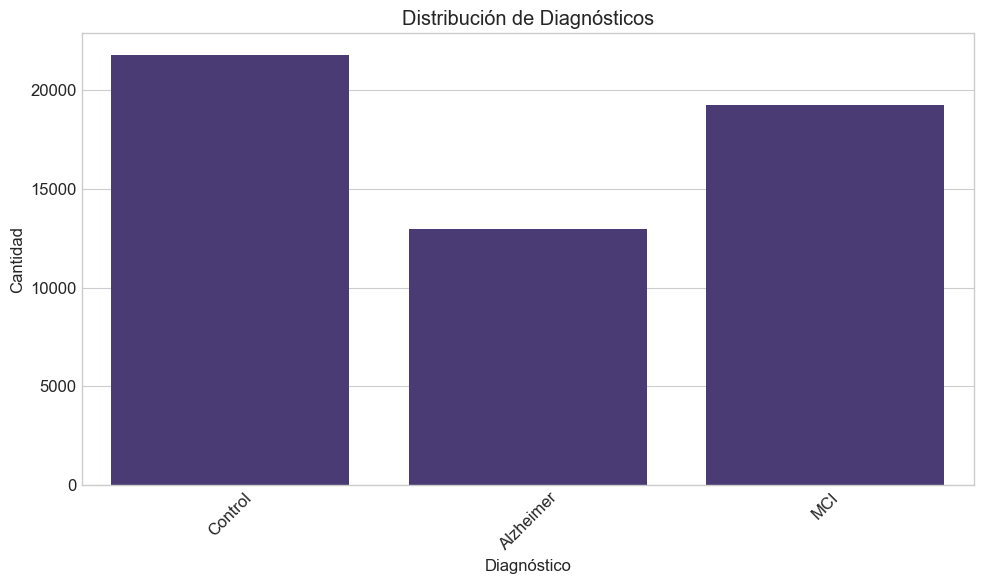


## Distribución por género


Género  Cantidad
0      M     27720
1      F     26280

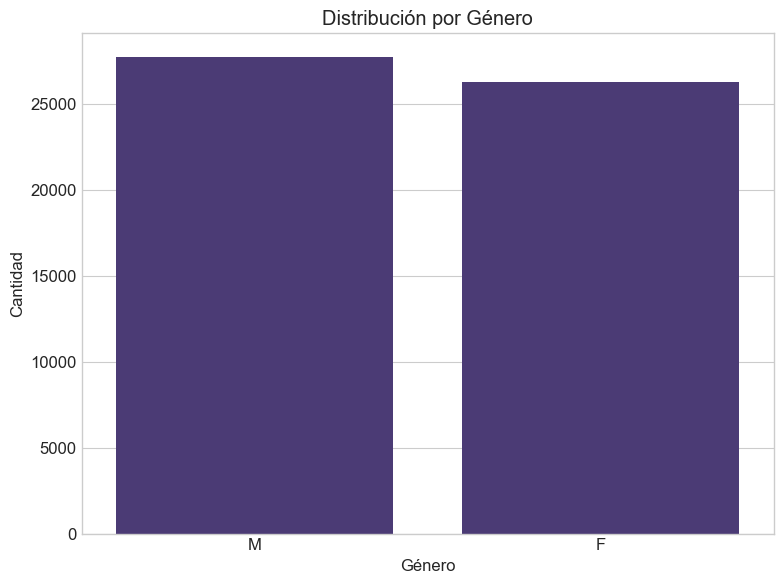


## Distribución por edad


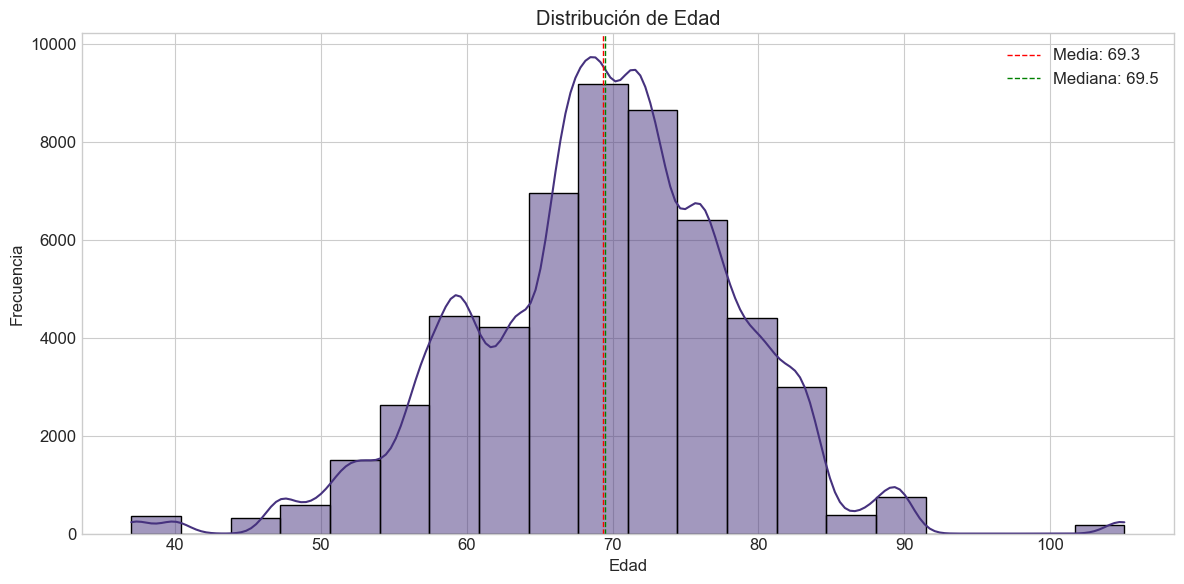

In [39]:
# Distribución de diagnósticos
diagnosis_counts = synthetic_df['diagnosis'].value_counts()
display(pd.DataFrame({'Diagnóstico': diagnosis_counts.index, 'Cantidad': diagnosis_counts.values}))

plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=synthetic_df)
plt.title('Distribución de Diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribución de género
print("\n## Distribución por género")
gender_counts = synthetic_df['gender'].value_counts()
display(pd.DataFrame({'Género': gender_counts.index, 'Cantidad': gender_counts.values}))

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=synthetic_df)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Distribución de edad
print("\n## Distribución por edad")
plt.figure(figsize=(12, 6))
sns.histplot(synthetic_df['age'], kde=True, bins=20)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.axvline(synthetic_df['age'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {synthetic_df["age"].mean():.1f}')
plt.axvline(synthetic_df['age'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {synthetic_df["age"].median():.1f}')
plt.legend()
plt.tight_layout()
plt.show()



De estos gráficos podemos observar que 

### Distribución y Outliers de las variables numéricas principales


## Distribución de variables de actividad y sueño


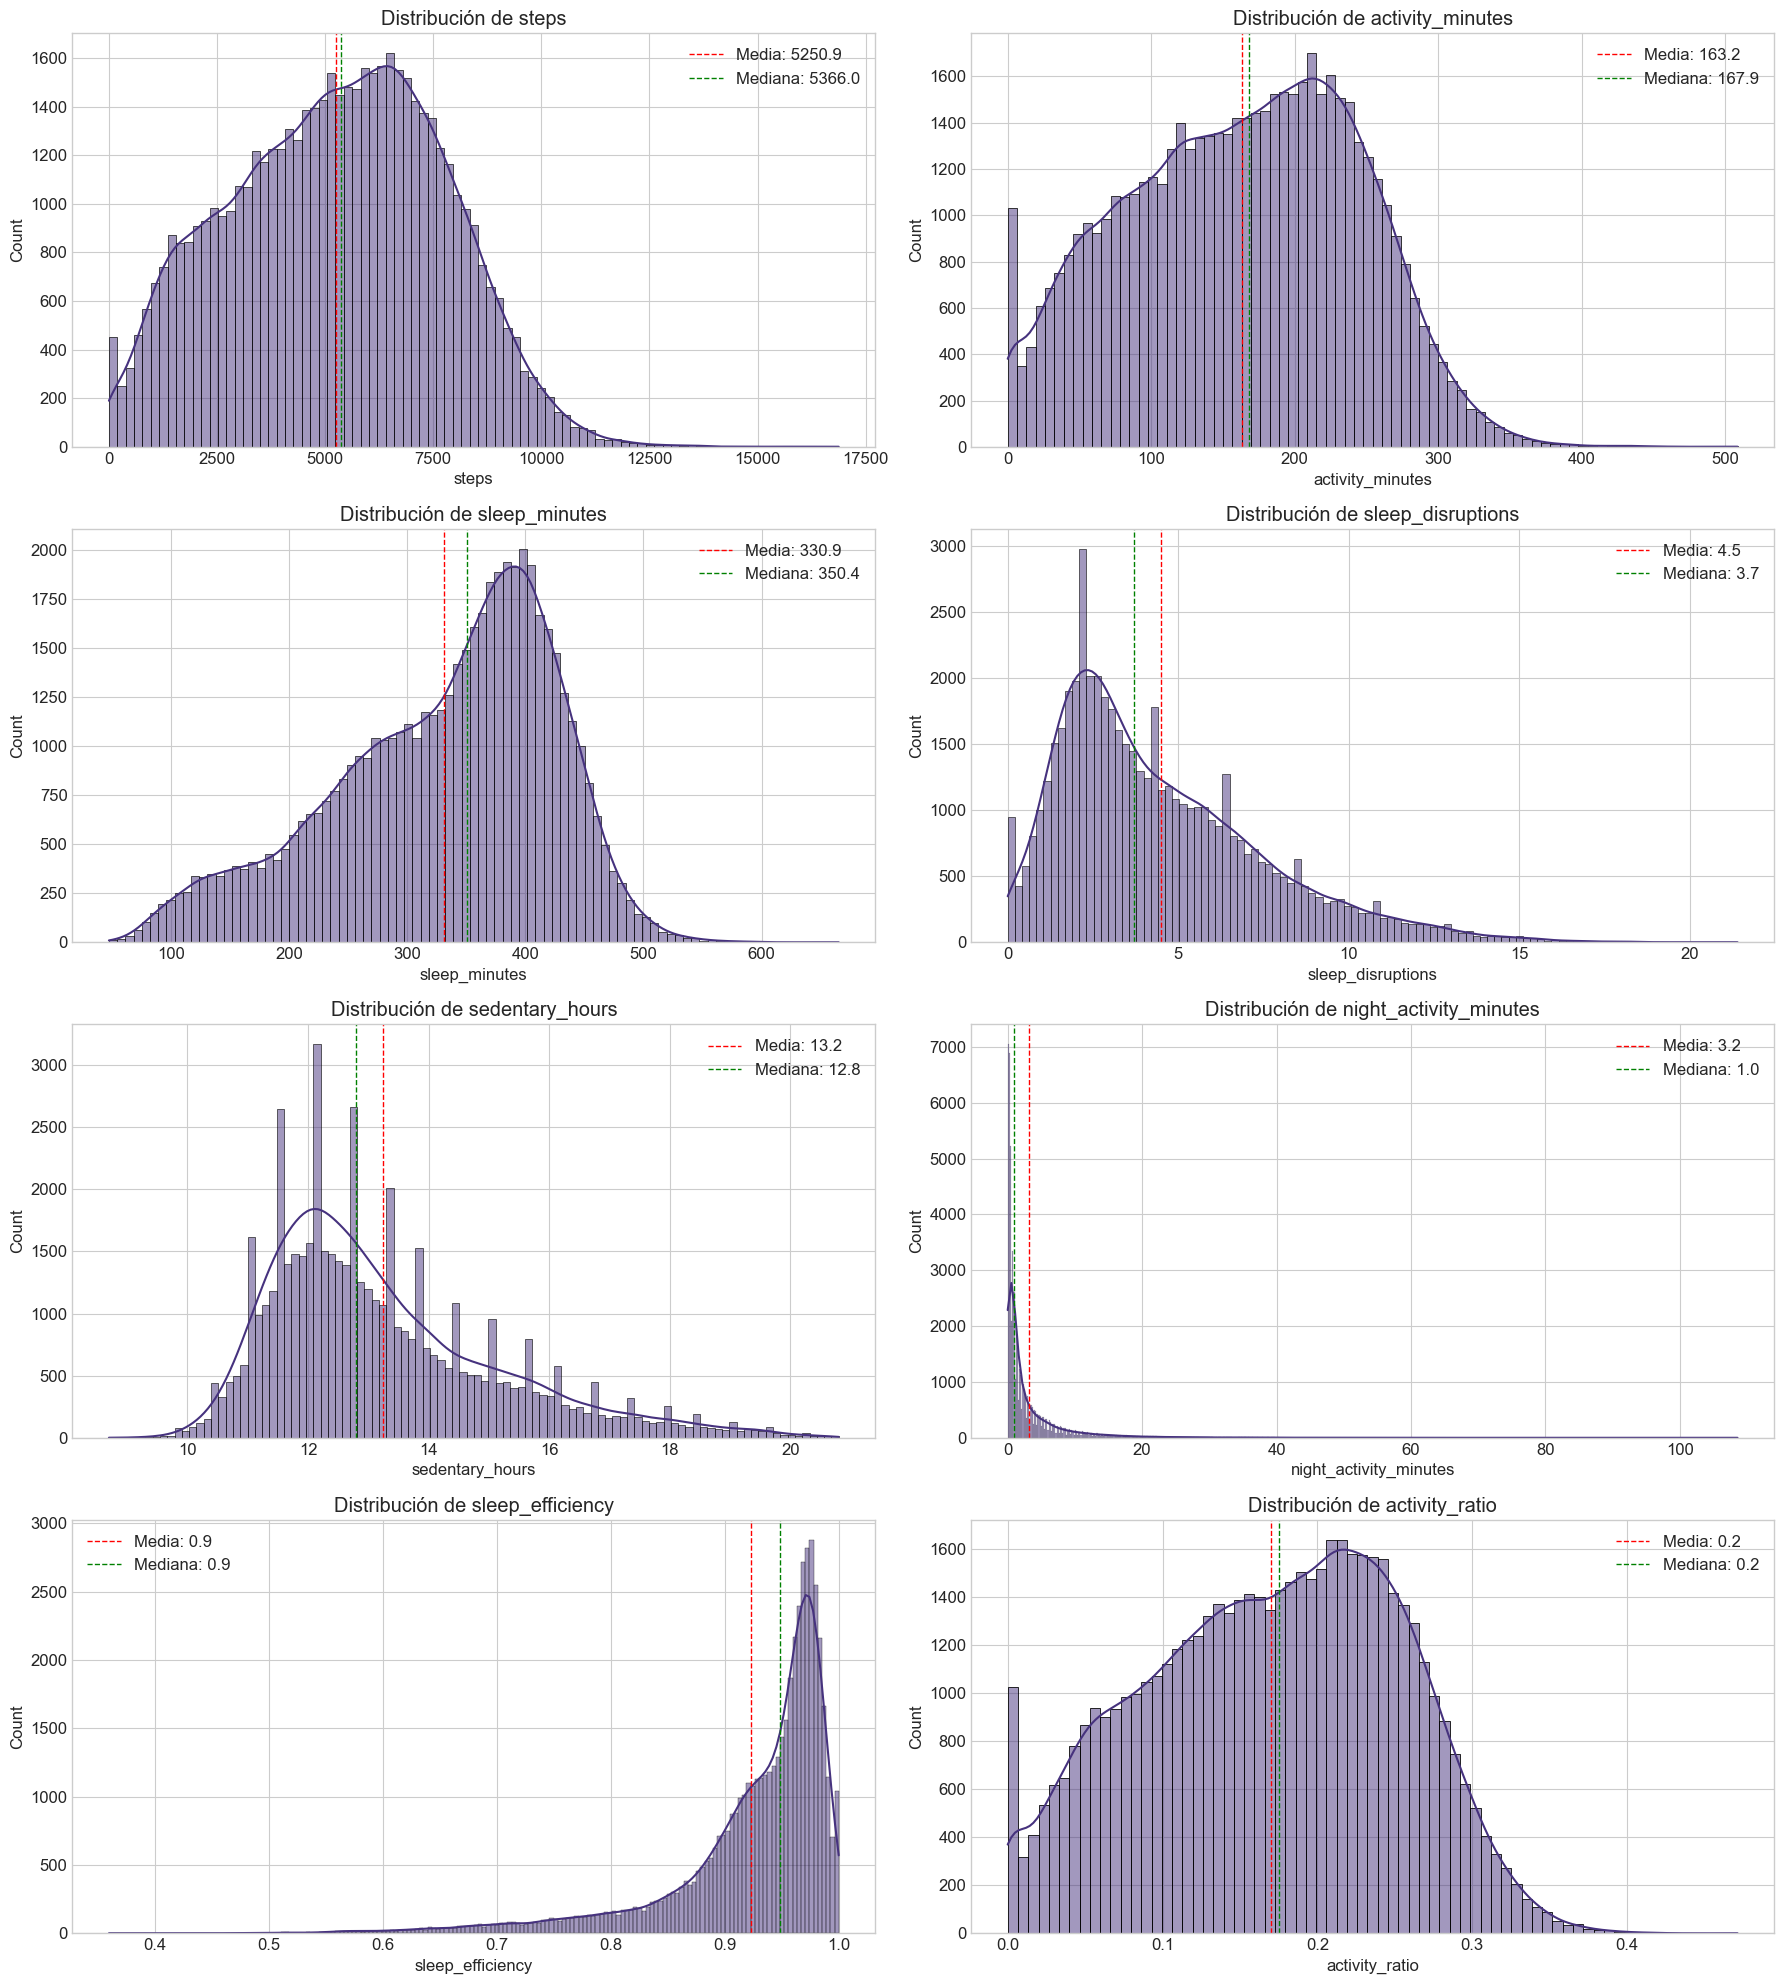


## Detección de outliers en variables de actividad y sueño


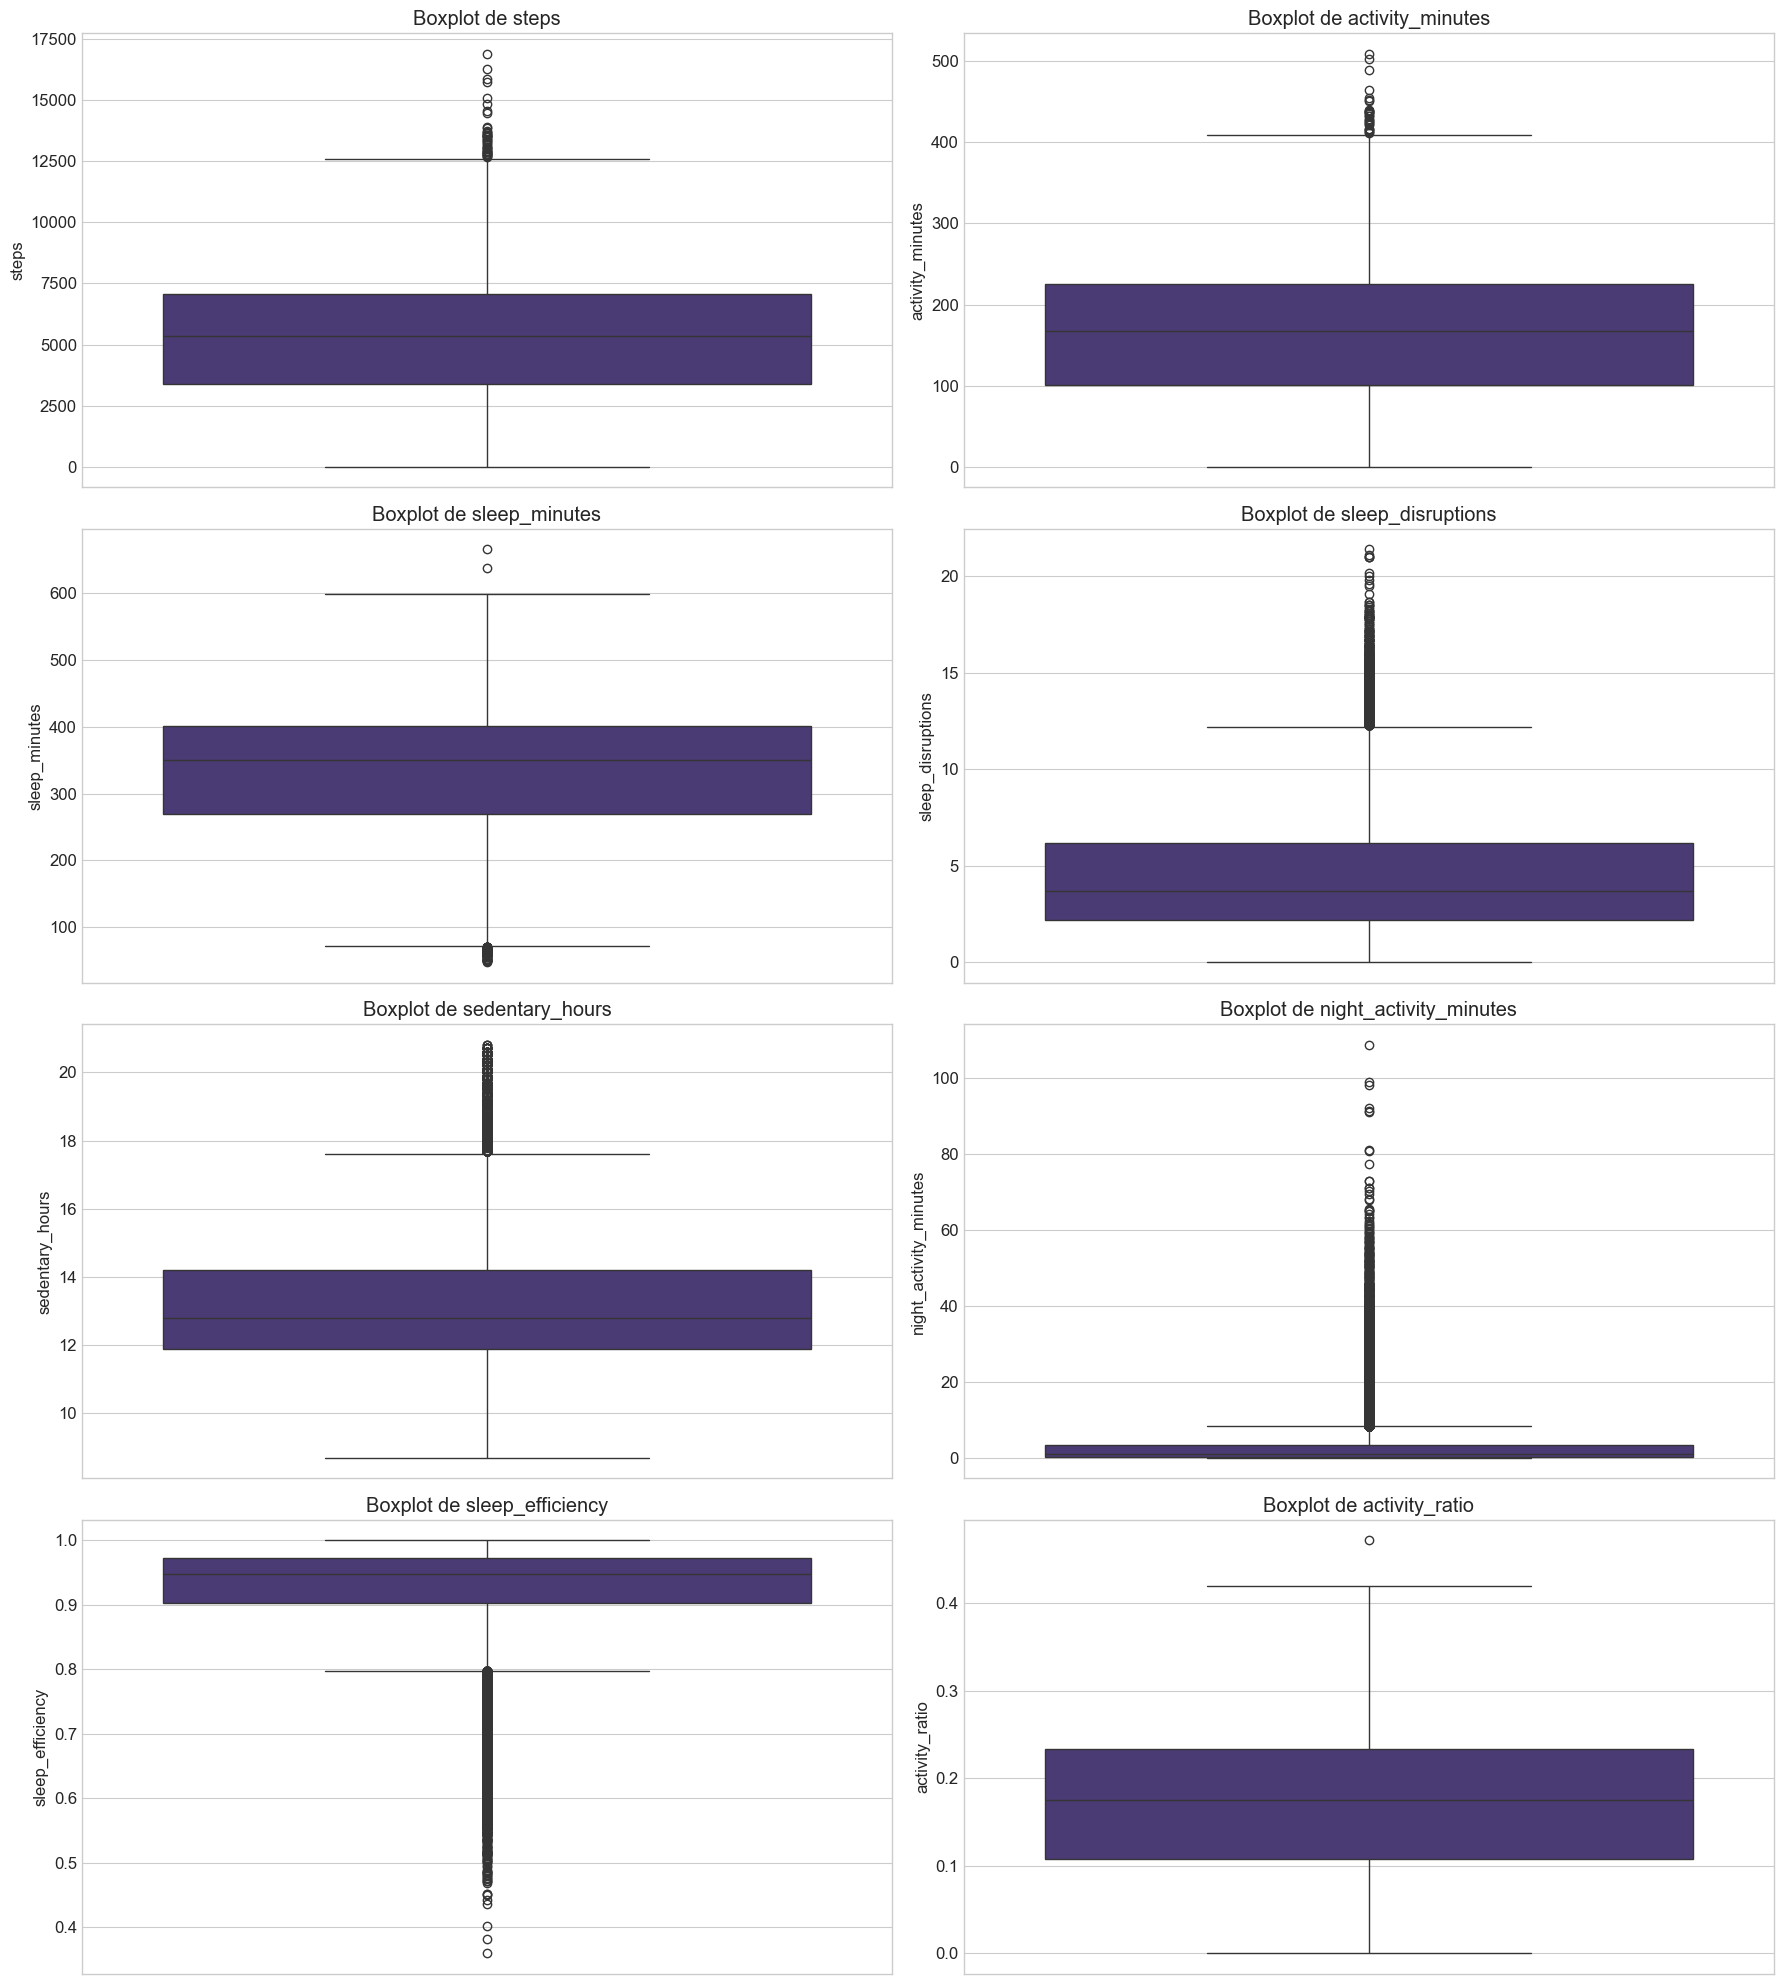

In [40]:
# Distribución de las variables numéricas principales relacionadas con actividad y sueño 
activity_sleep_vars = ['steps', 'activity_minutes', 'sleep_minutes', 'sleep_disruptions', 
                        'sedentary_hours', 'night_activity_minutes', 'sleep_efficiency', 'activity_ratio']

print("\n## Distribución de variables de actividad y sueño")
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for i, var in enumerate(activity_sleep_vars):
    sns.histplot(synthetic_df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].axvline(synthetic_df[var].mean(), color='red', linestyle='dashed', 
                    linewidth=1, label=f'Media: {synthetic_df[var].mean():.1f}')
    axes[i].axvline(synthetic_df[var].median(), color='green', linestyle='dashed', 
                    linewidth=1, label=f'Mediana: {synthetic_df[var].median():.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Boxplots para detectar outliers en las variables principales
print("\n## Detección de outliers en variables de actividad y sueño")
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for i, var in enumerate(activity_sleep_vars):
    sns.boxplot(y=synthetic_df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

## Análisis Bivariante


## Relación entre variables de actividad/sueño y diagnóstico


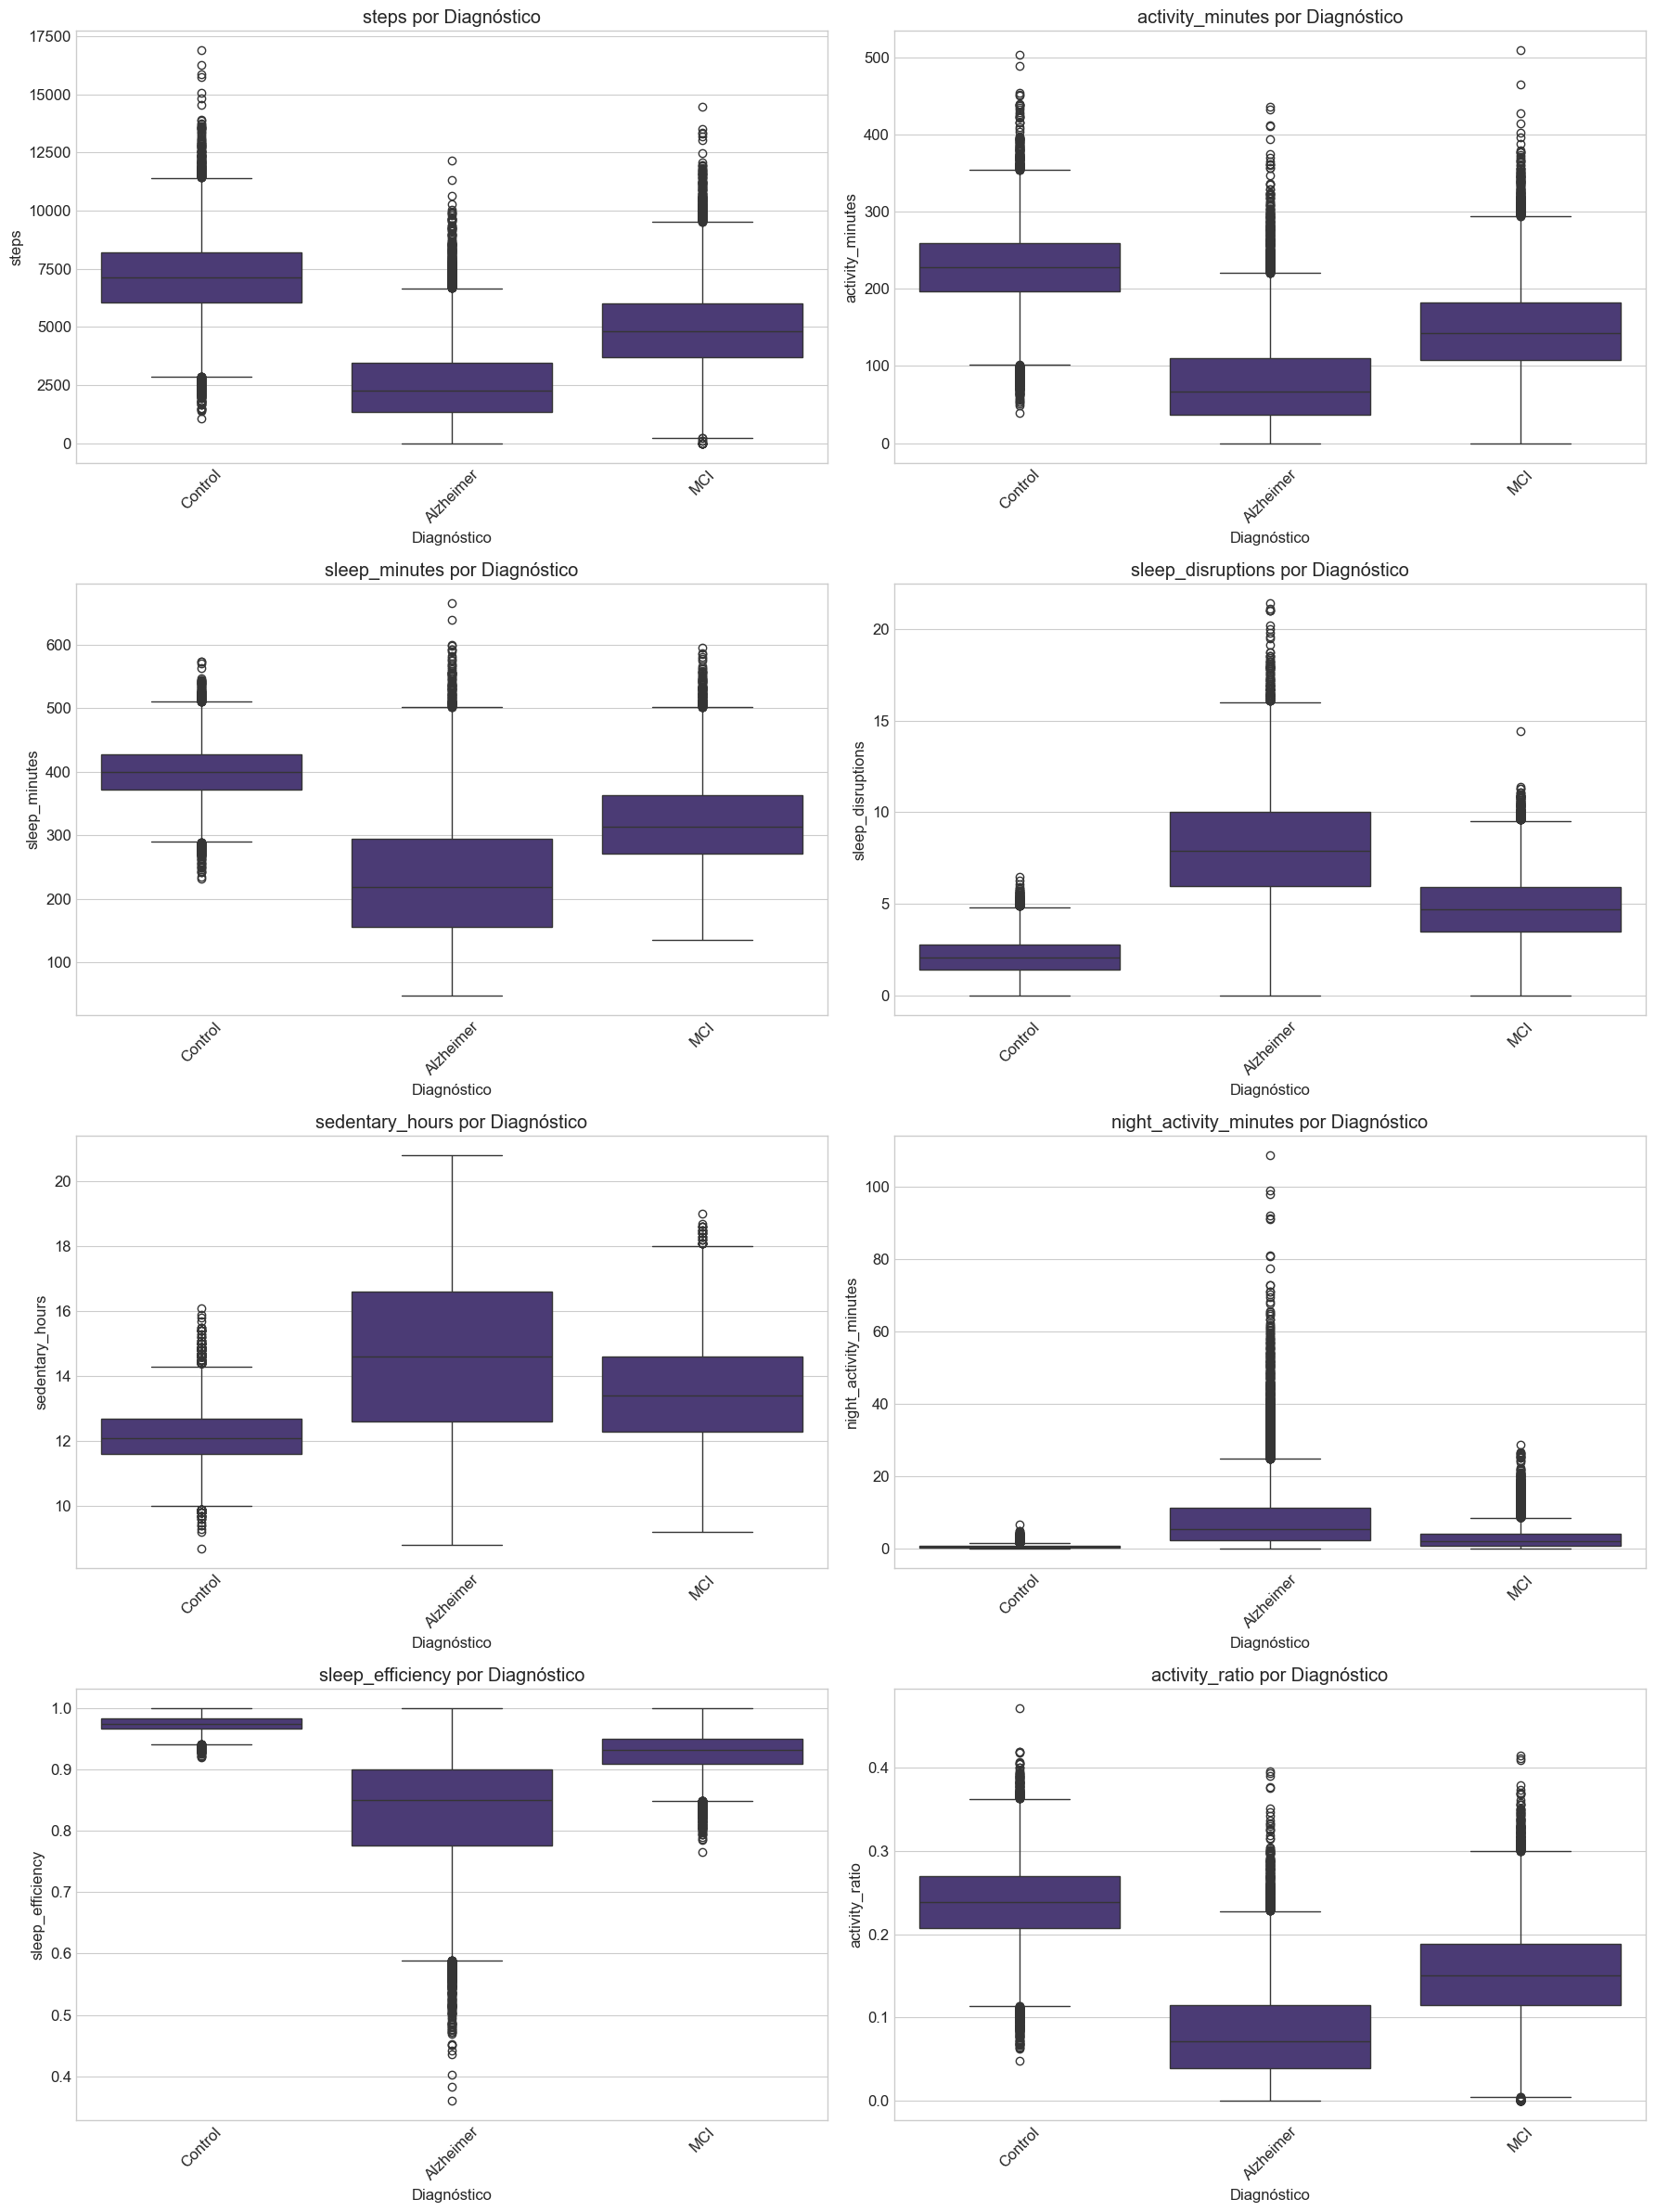


## Análisis de varianza (ANOVA) por diagnóstico


F-value p-value Significativo
steps                   30353.758148     0.0          True
activity_minutes        32654.293855     0.0          True
sleep_minutes           26164.348512     0.0          True
sleep_disruptions       39185.026164     0.0          True
sedentary_hours          9618.545944     0.0          True
night_activity_minutes  10300.880269     0.0          True
sleep_efficiency        34131.225685     0.0          True
activity_ratio          36532.503947     0.0          True


## Matriz de correlación entre variables numéricas


age     steps  activity_minutes  sleep_minutes  \
age                     1.000000 -0.352614         -0.352900      -0.339942   
steps                  -0.352614  1.000000          0.628702       0.692485   
activity_minutes       -0.352900  0.628702          1.000000       0.683867   
sleep_minutes          -0.339942  0.692485          0.683867       1.000000   
sleep_disruptions       0.360272 -0.606063         -0.607068      -0.638223   
sedentary_hours         0.242966 -0.281532         -0.540316      -0.185035   
night_activity_minutes  0.232943 -0.422785         -0.420734      -0.473583   
sleep_efficiency       -0.340091  0.648081          0.637673       0.808898   
activity_ratio         -0.361874  0.612654          0.986463       0.645488   

                        sleep_disruptions  sedentary_hours  \
age                              0.360272         0.242966   
steps                           -0.606063        -0.281532   
activity_minutes                -0.607068        -0.540316   
sleep_minutes                   -0.638223        -0.185035   
sleep_disruptions                1.000000         0.420929   
sedentary_hours                  0.420929         1.000000   
night_activity_minutes           0.457232         0.298479   
sleep_efficiency                -0.896374        -0.303704   
activity_ratio                  -0.622144        -0.647482   

                        night_activity_minutes  sleep_efficiency  \
age                                   0.232943         -0.340091   
steps                                -0.422785          0.648081   
activity_minutes                     -0.420734          0.637673   
sleep_minutes                        -0.473583          0.808898   
sleep_disruptions                     0.457232         -0.896374   
sedentary_hours                       0.298479         -0.303704   
night_activity_minutes                1.000000         -0.509312   
sleep_efficiency                     -0.509312          1.000000   
activity_ratio                       -0.431944          0.635066   

                        activity_ratio  
age                          -0.361874  
steps                         0.612654  
activity_minutes              0.986463  
sleep_minutes                 0.645488  
sleep_disruptions            -0.622144  
sedentary_hours              -0.647482  
night_activity_minutes       -0.431944  
sleep_efficiency              0.635066  
activity_ratio                1.000000

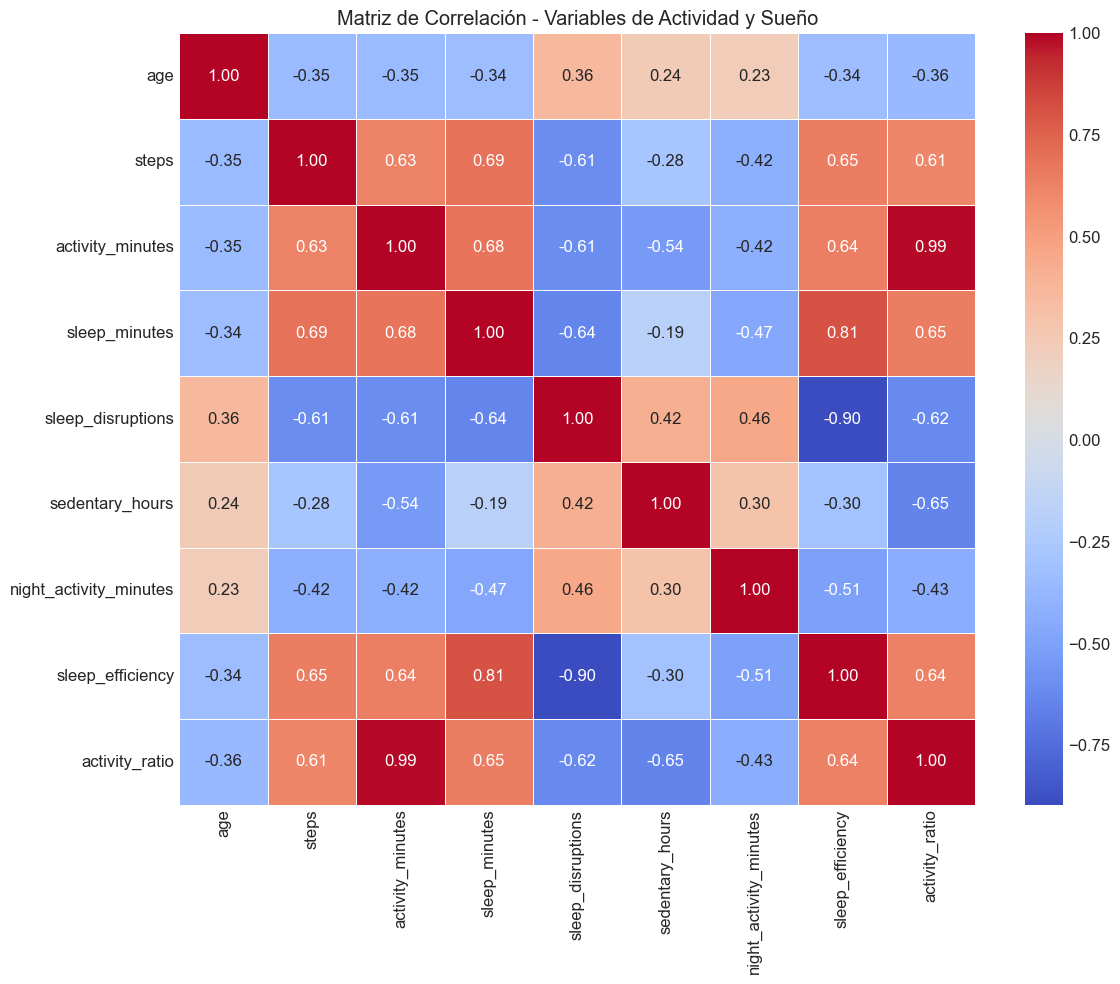

In [42]:
print("\n## Relación entre variables de actividad/sueño y diagnóstico")

fig, axes = plt.subplots(4, 2, figsize=(18, 24))
axes = axes.flatten()

for i, var in enumerate(activity_sleep_vars):
    sns.boxplot(x='diagnosis', y=var, data=synthetic_df, ax=axes[i])
    axes[i].set_title(f'{var} por Diagnóstico')
    axes[i].set_xlabel('Diagnóstico')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ANOVA para comprobar si hay diferencias significativas entre grupos de diagnóstico
print("\n## Análisis de varianza (ANOVA) por diagnóstico")
anova_results = {}

for var in activity_sleep_vars:
    groups = [synthetic_df[synthetic_df['diagnosis'] == diag][var] for diag in synthetic_df['diagnosis'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[var] = {'F-value': f_val, 'p-value': p_val, 'Significativo': p_val < 0.05}

display(pd.DataFrame(anova_results).T)

# Matriz de correlación para variables numéricas
print("\n## Matriz de correlación entre variables numéricas")
corr_vars = ['age', 'steps', 'activity_minutes', 'sleep_minutes', 'sleep_disruptions', 
             'sedentary_hours', 'night_activity_minutes', 'sleep_efficiency', 'activity_ratio']

corr_matrix = synthetic_df[corr_vars].corr()
display(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables de Actividad y Sueño')
plt.tight_layout()
plt.show() v


## Relación entre edad y variables de actividad/sueño


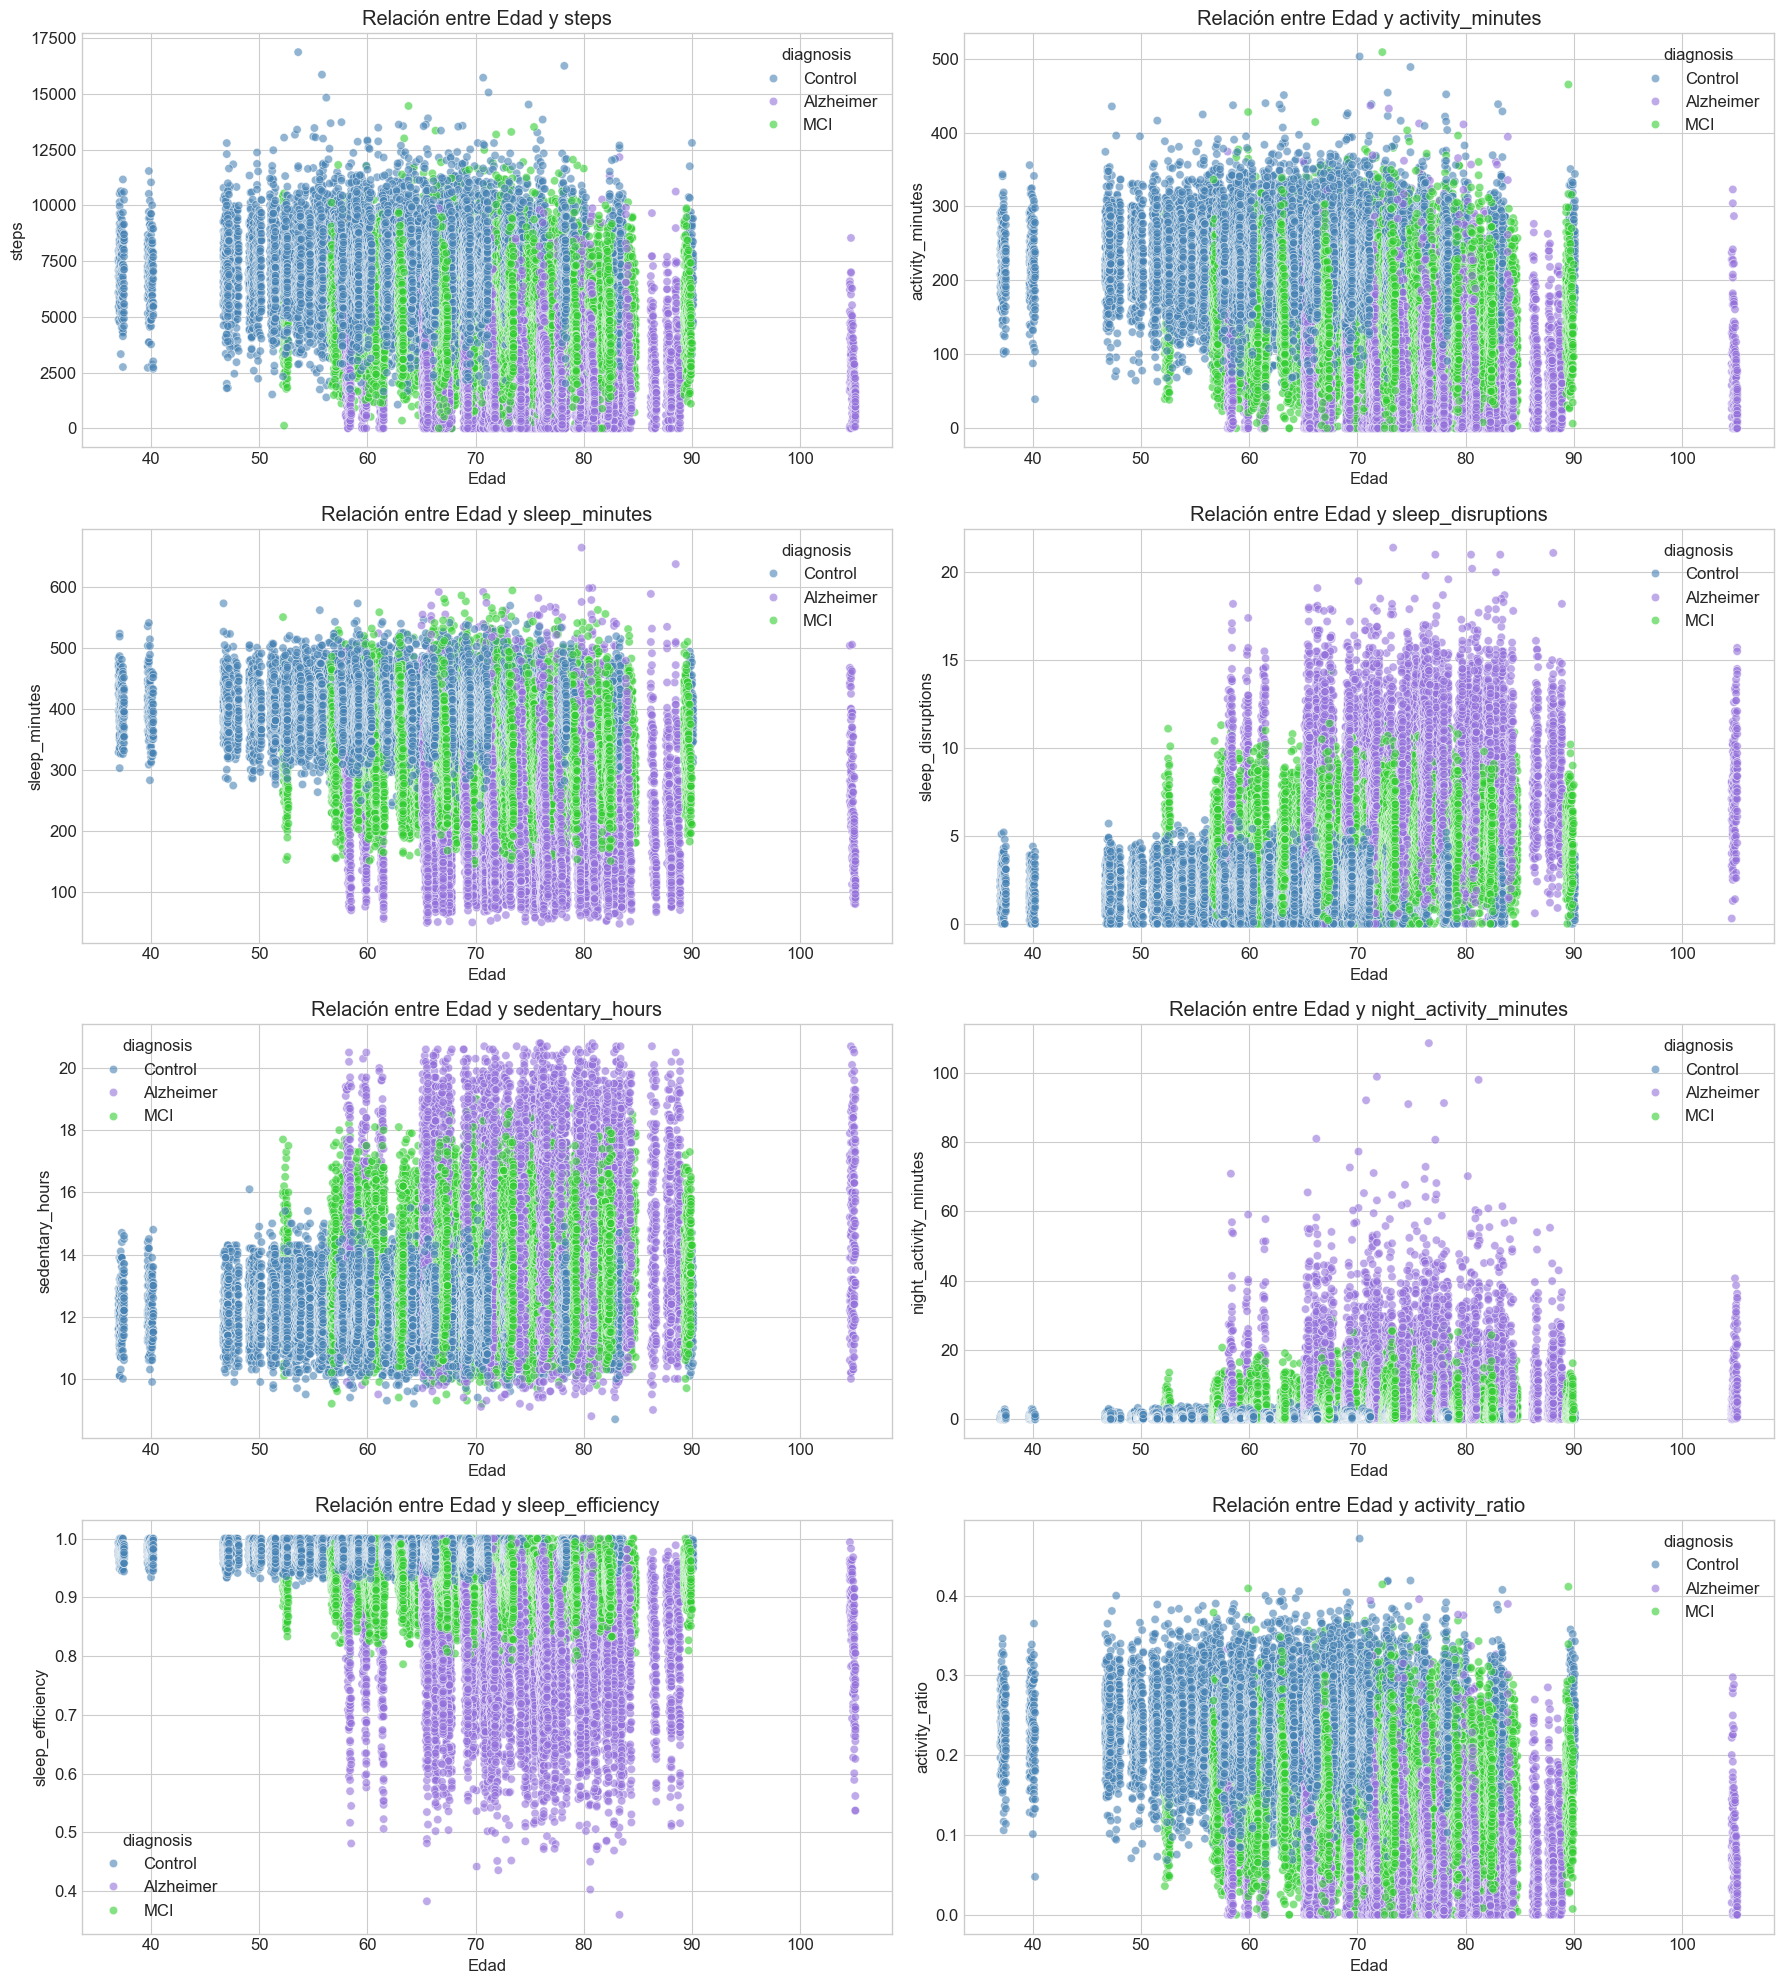


## Relación entre género y variables de actividad/sueño


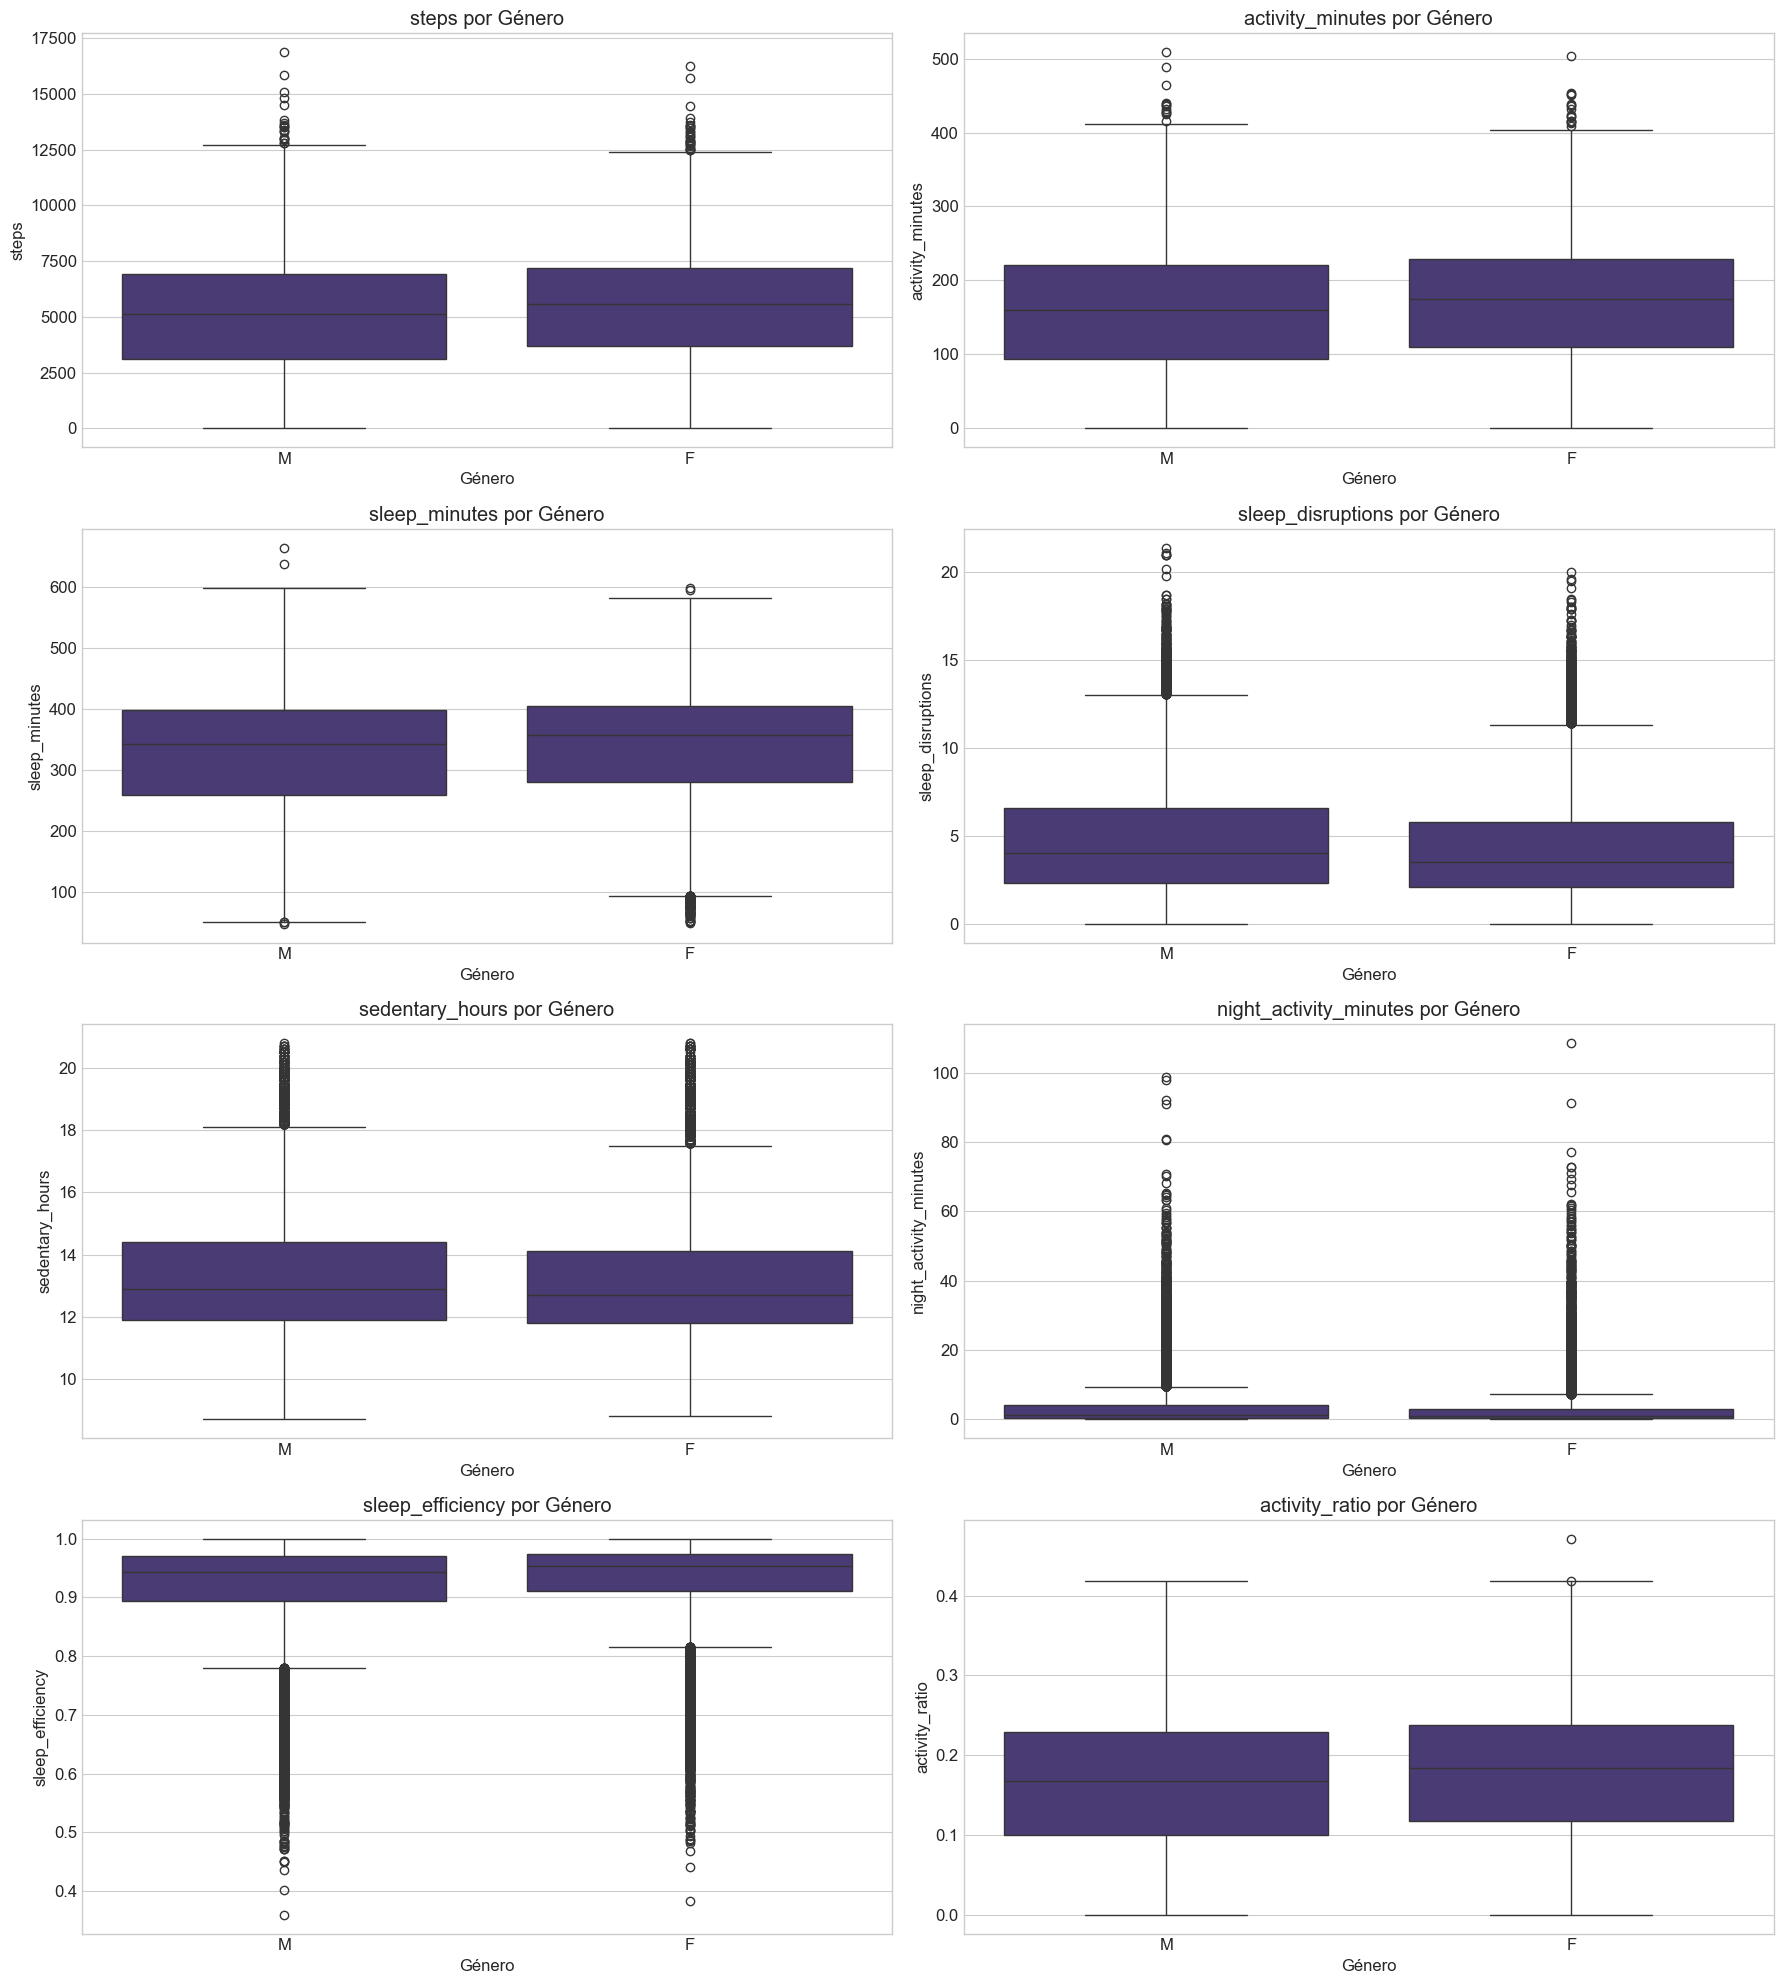

In [51]:
# Relación entre edad y variables de actividad/sueño
print("\n## Relación entre edad y variables de actividad/sueño")
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

diagnosis_palette = {
    'Control': '#4682B4',    # Azul profesional
    'MCI': '#32CD32',        # Verde claro distinguible
    'Alzheimer': '#9370DB'   # Morado suave
}

for i, var in enumerate(activity_sleep_vars):
    sns.scatterplot(x='age', y=var, hue='diagnosis', data=synthetic_df, palette=diagnosis_palette, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Relación entre Edad y {var}')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Relación entre género y variables de actividad/sueño
print("\n## Relación entre género y variables de actividad/sueño")
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

for i, var in enumerate(activity_sleep_vars):
    sns.boxplot(x='gender', y=var, data=synthetic_df, ax=axes[i])
    axes[i].set_title(f'{var} por Género')
    axes[i].set_xlabel('Género')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

## Análisis Temporal


## Tendencias mensuales en actividad y sueño


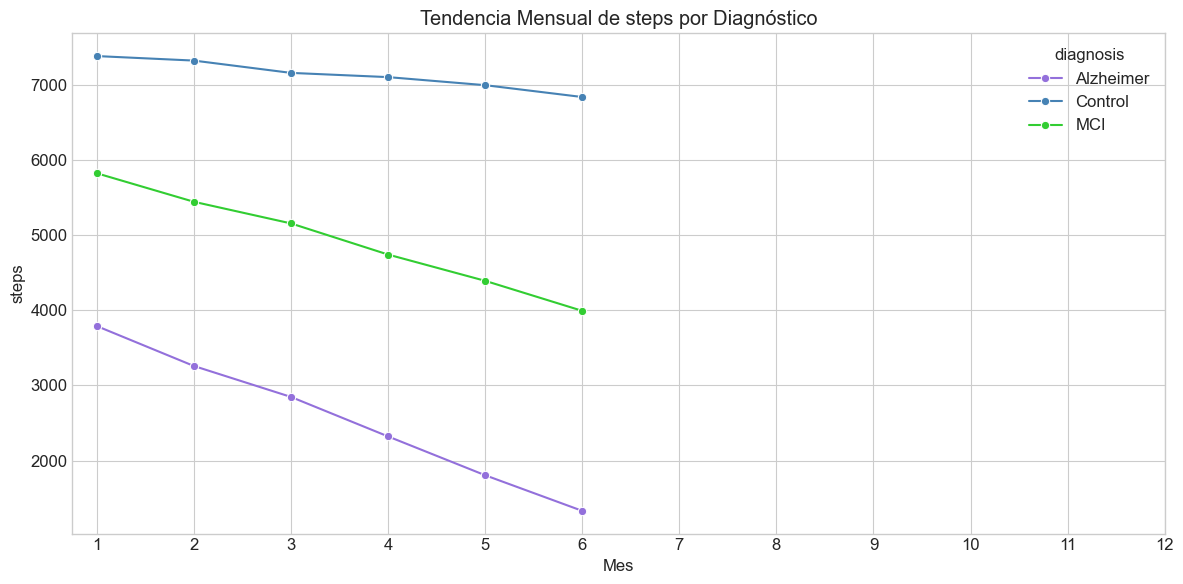

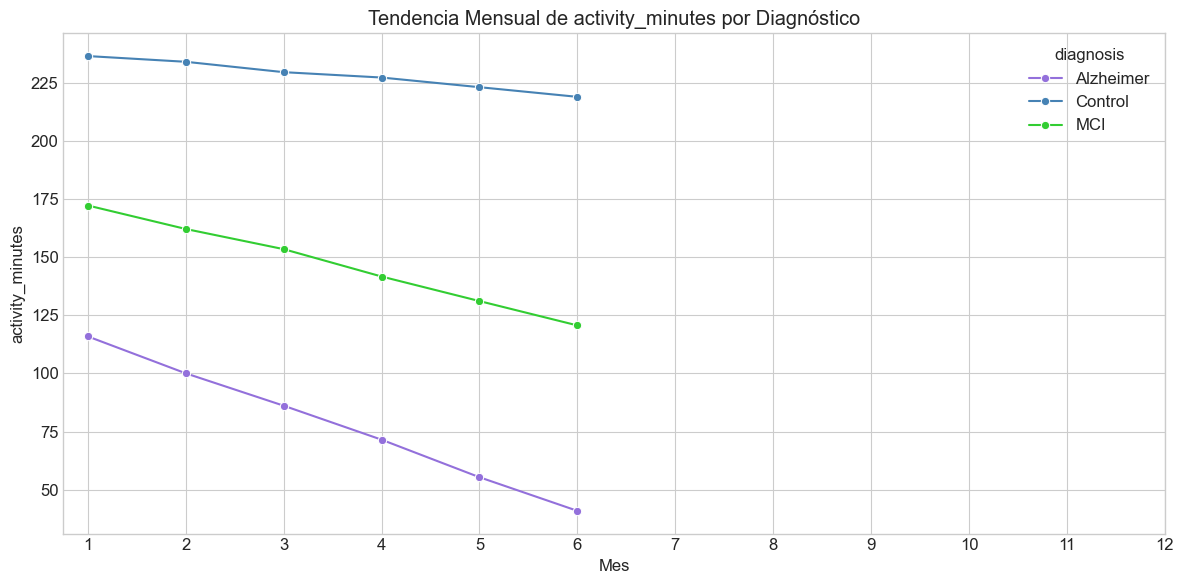

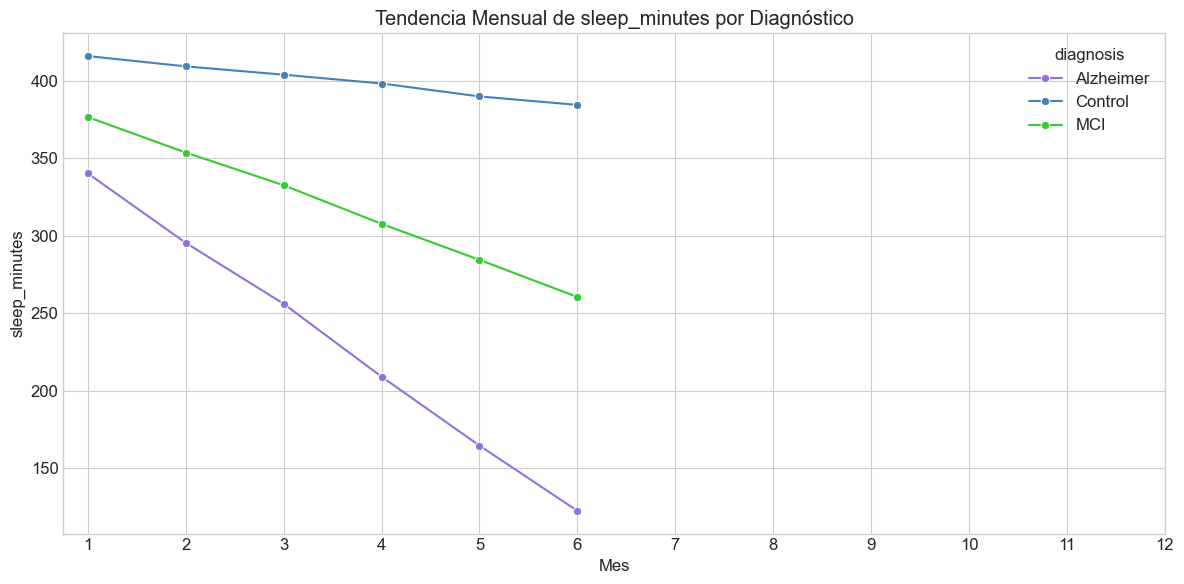

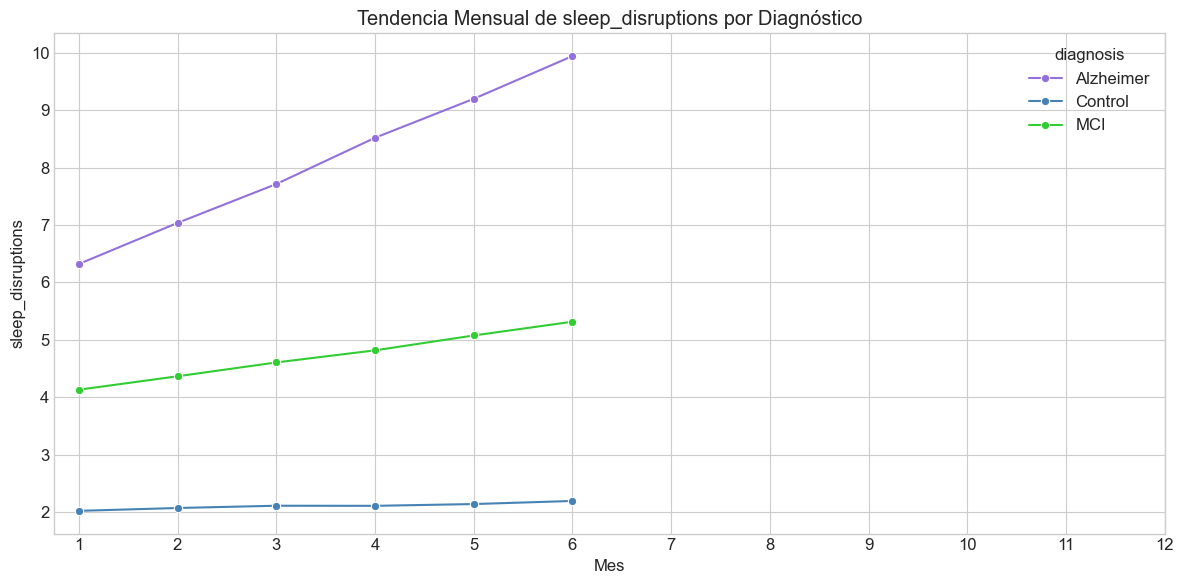


## Patrones por día de la semana


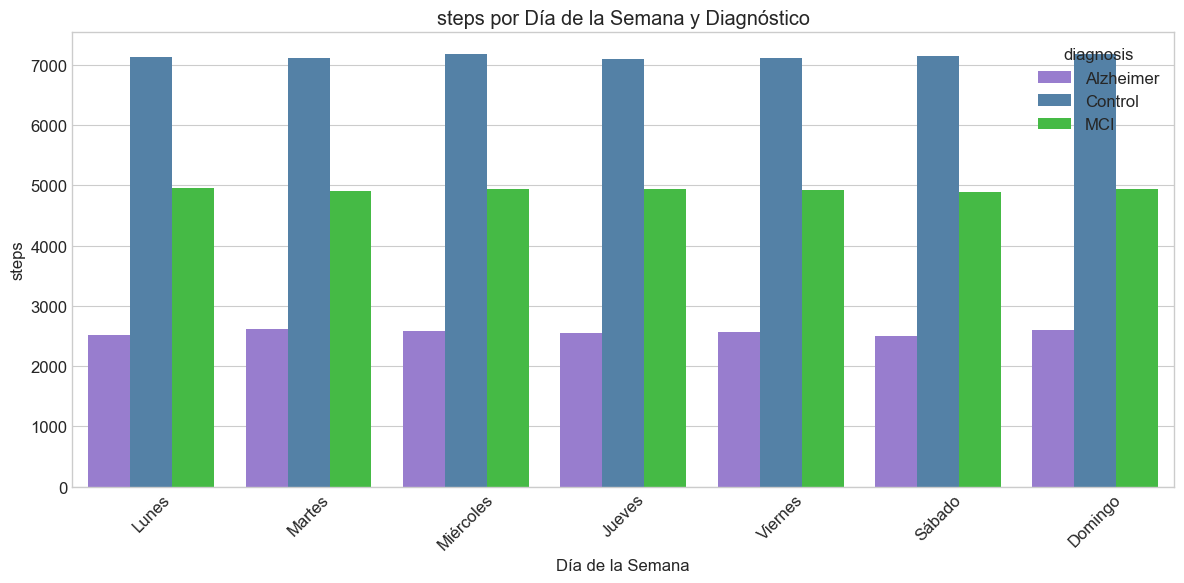

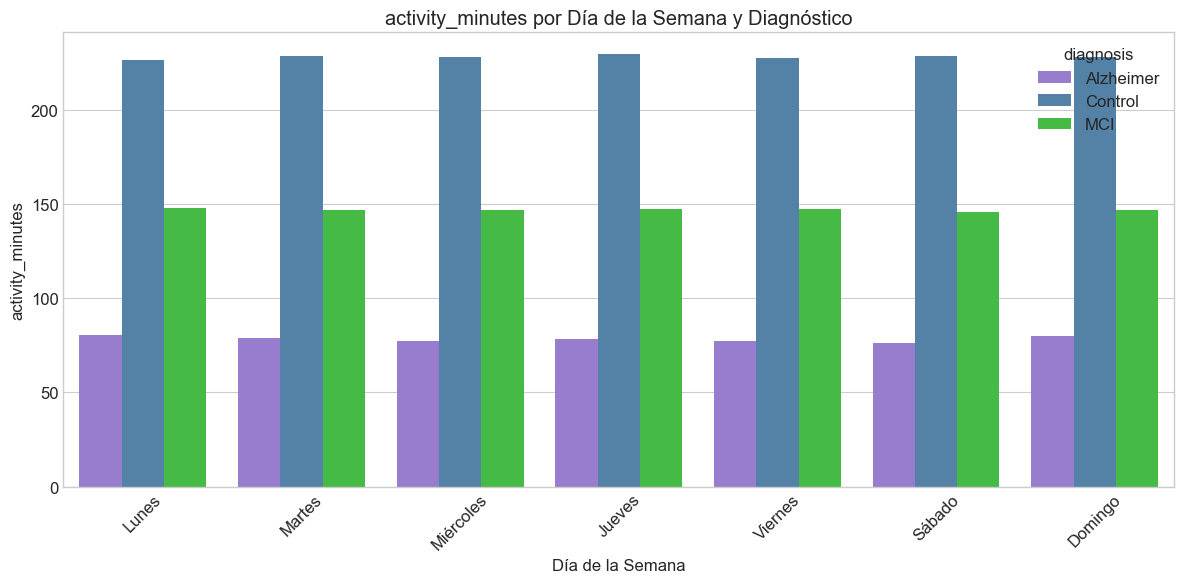

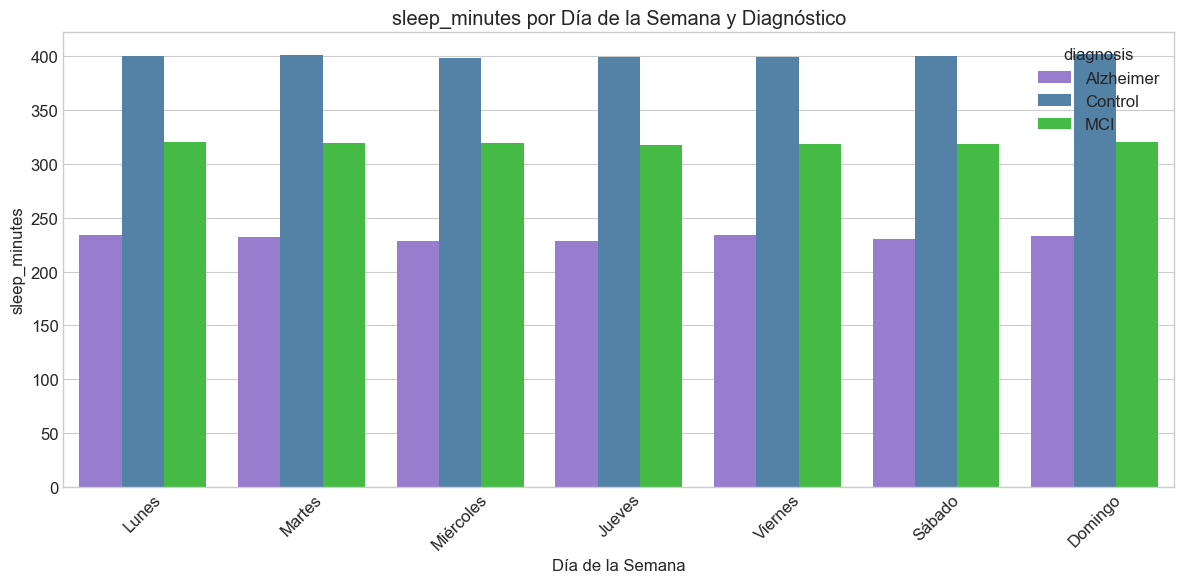

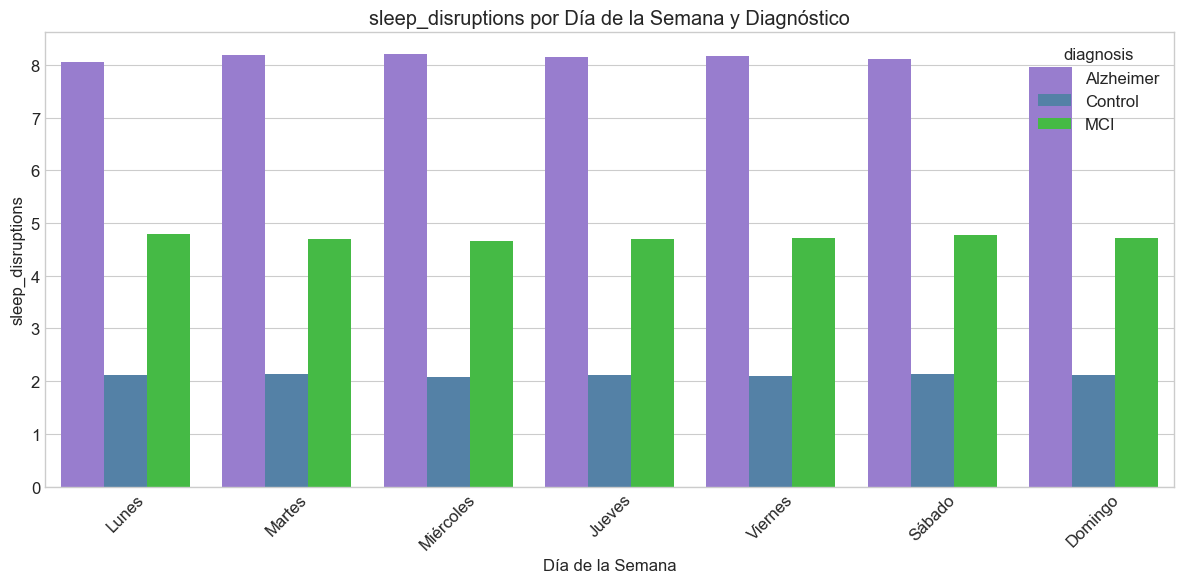

In [50]:
# Agregación por mes para ver tendencias estacionales
print("\n## Tendencias mensuales en actividad y sueño")
monthly_agg = synthetic_df.groupby(['month', 'diagnosis'])[activity_sleep_vars].mean().reset_index()

diagnosis_palette = {
    'Control': '#4682B4',    # Azul profesional
    'MCI': '#32CD32',        # Verde claro distinguible
    'Alzheimer': '#9370DB'   # Morado suave
}

for var in activity_sleep_vars[:4]:  # Mostramos solo 4 variables para no sobrecargar
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='month', y=var, hue='diagnosis', data=monthly_agg, palette=diagnosis_palette, marker='o')
    plt.title(f'Tendencia Mensual de {var} por Diagnóstico')
    plt.xlabel('Mes')
    plt.ylabel(var)
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()

# Agregación por día de la semana
print("\n## Patrones por día de la semana")
weekday_agg = synthetic_df.groupby(['day_of_week', 'diagnosis'])[activity_sleep_vars].mean().reset_index()

# Mapeo de números a nombres de días
weekday_names = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
weekday_agg['day_name'] = weekday_agg['day_of_week'].map(weekday_names)

for var in activity_sleep_vars[:4]:  # Mostramos solo 4 variables para no sobrecargar
    plt.figure(figsize=(12, 6))
    sns.barplot(x='day_name', y=var, hue='diagnosis', data=weekday_agg, palette=diagnosis_palette)
    plt.title(f'{var} por Día de la Semana y Diagnóstico')
    plt.xlabel('Día de la Semana')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Análisis Multivariante


## Análisis de Componentes Principales (PCA)

### Varianza explicada por cada componente principal


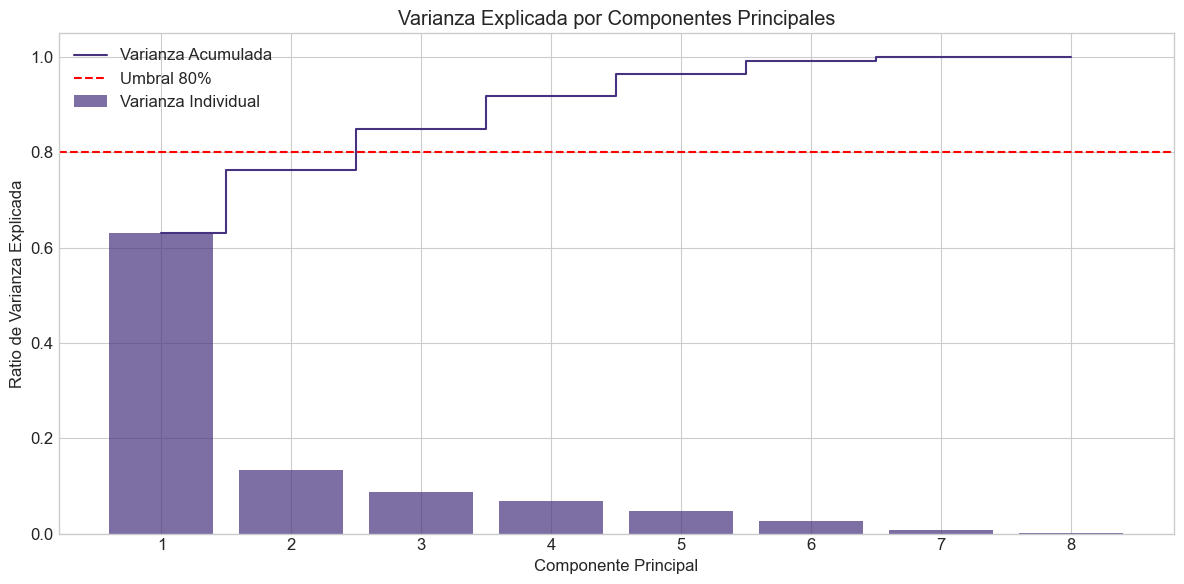

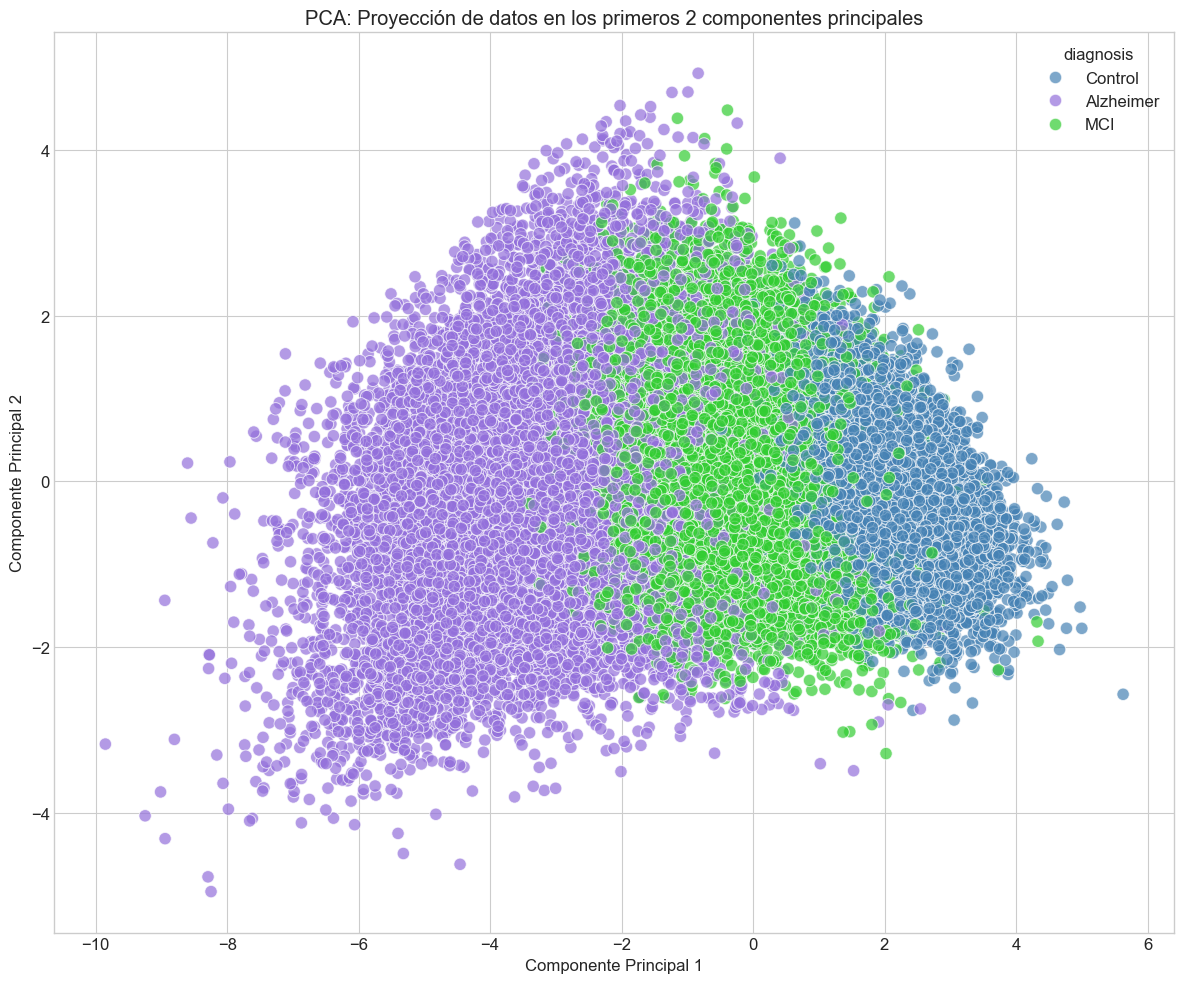


### Loadings (contribuciones) de cada variable a los componentes principales


PC1       PC2       PC3       PC4       PC5       PC6  \
steps              0.349650  0.208018  0.198338  0.260894  0.843402 -0.107845   
activity_minutes   0.393441 -0.258209  0.252815  0.304822 -0.289956 -0.304783   
sleep_minutes      0.370736  0.347230  0.181449  0.198966 -0.227255  0.710083   
sleep_disruptions -0.374609 -0.154310  0.047976  0.634890 -0.013072  0.342082   
sedentary_hours   -0.246169  0.717880  0.207095  0.286725 -0.269138 -0.460843   

                        PC7       PC8  
steps              0.064118  0.000238  
activity_minutes  -0.026286 -0.666365  
sleep_minutes     -0.335585  0.031546  
sleep_disruptions  0.559127 -0.025590  
sedentary_hours   -0.029220  0.115258

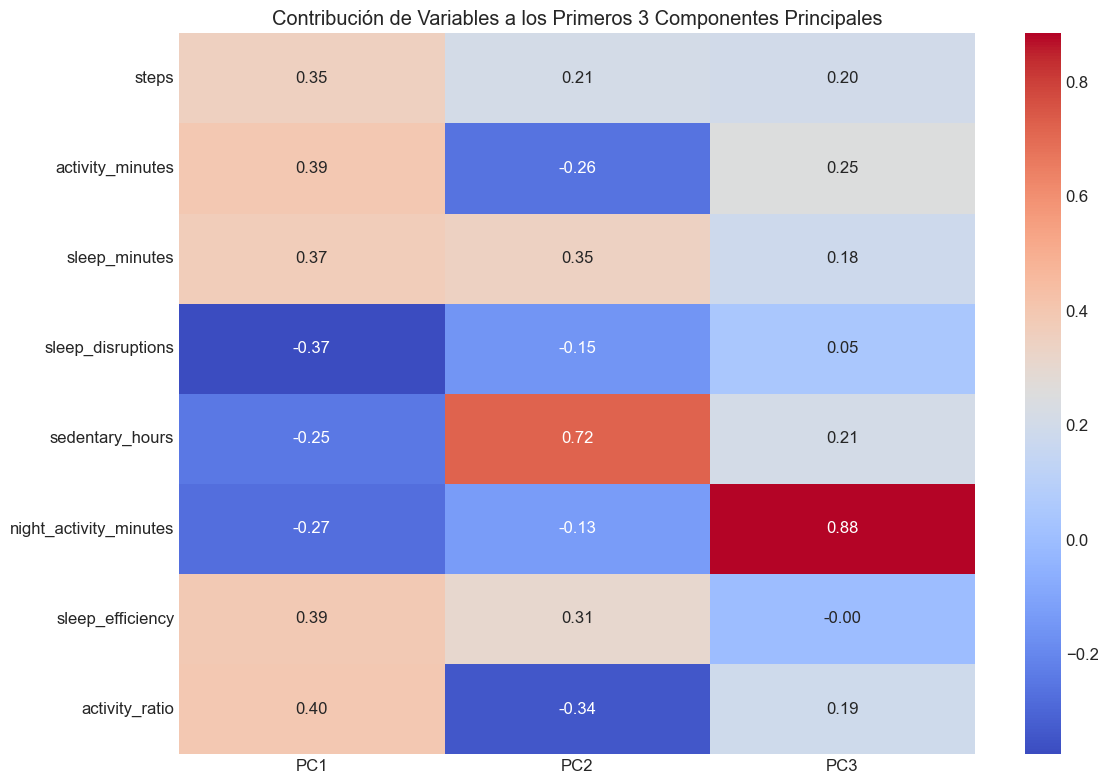


## Gráfico de pares para variables clave


<Figure size 1600x1400 with 0 Axes>

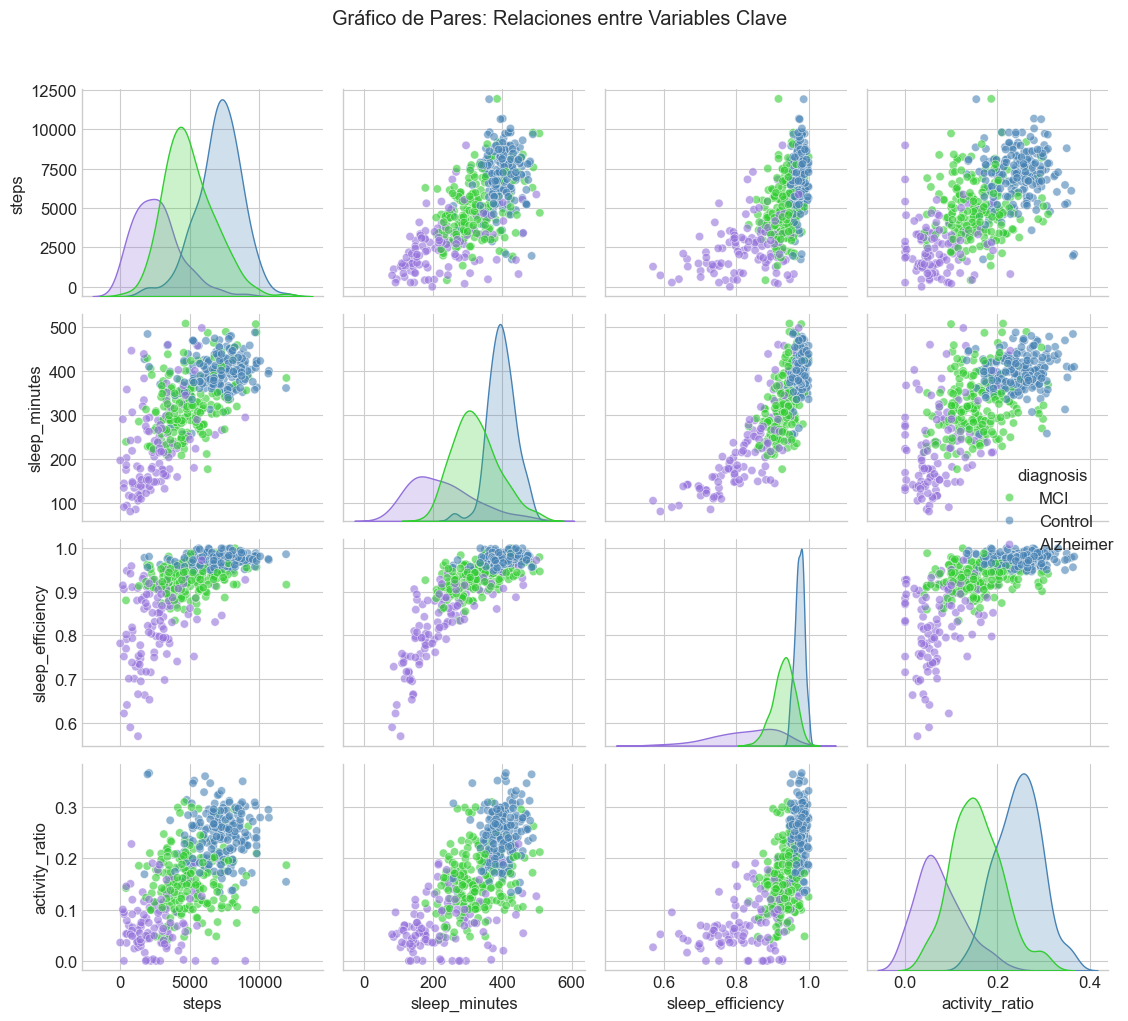

In [54]:
# Análisis de Componentes Principales (PCA)
print("\n## Análisis de Componentes Principales (PCA)")

# Definir la paleta de colores profesional
diagnosis_palette = {
    'Control': '#4682B4',    # Azul profesional
    'MCI': '#32CD32',        # Verde claro distinguible
    'Alzheimer': '#9370DB'   # Morado suave
}

# Seleccionar y escalar variables numéricas para PCA
pca_vars = activity_sleep_vars
X = synthetic_df[pca_vars]
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Varianza explicada por componente
print("\n### Varianza explicada por cada componente principal")
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Varianza Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza Acumulada')
plt.axhline(y=0.8, color='r', linestyle='--', label='Umbral 80%')
plt.xlabel('Componente Principal')
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend()
plt.tight_layout()
plt.show()

# Crear dataframe con resultados de PCA
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])
pca_df['diagnosis'] = synthetic_df['diagnosis']

# Visualizar los primeros 2 componentes principales
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, s=80, alpha=0.7, palette=diagnosis_palette)
plt.title('PCA: Proyección de datos en los primeros 2 componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()

# Loadings del PCA (contribución de cada variable a los componentes)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=pca_vars
)

print("\n### Loadings (contribuciones) de cada variable a los componentes principales")
display(loadings.head())

plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :3], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Contribución de Variables a los Primeros 3 Componentes Principales')
plt.tight_layout()
plt.show()

# Gráfico de pares para variables clave por diagnóstico
print("\n## Gráfico de pares para variables clave")
key_vars = ['steps', 'sleep_minutes', 'sleep_efficiency', 'activity_ratio']
scatter_df = synthetic_df[key_vars + ['diagnosis']].sample(min(500, len(synthetic_df)))

plt.figure(figsize=(16, 14))
sns.pairplot(scatter_df, hue='diagnosis', diag_kind='kde', plot_kws={'alpha': 0.6}, palette=diagnosis_palette)
plt.suptitle('Gráfico de Pares: Relaciones entre Variables Clave', y=1.02)
plt.tight_layout()
plt.show()

### Análisis de Subgrupos


# Análisis por Subgrupos

## Análisis por grupos de edad


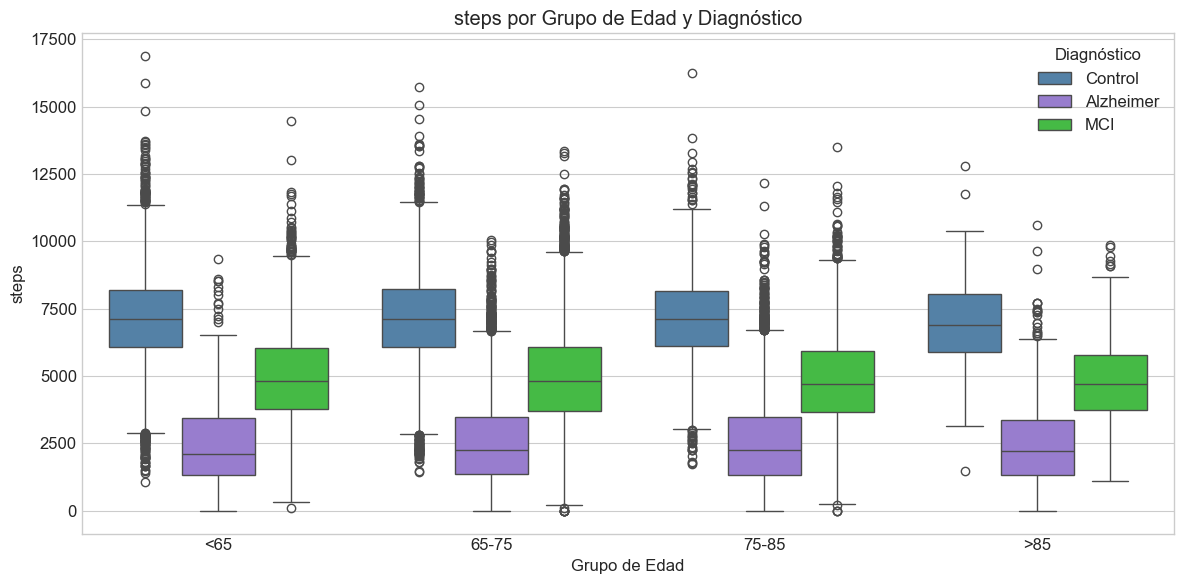

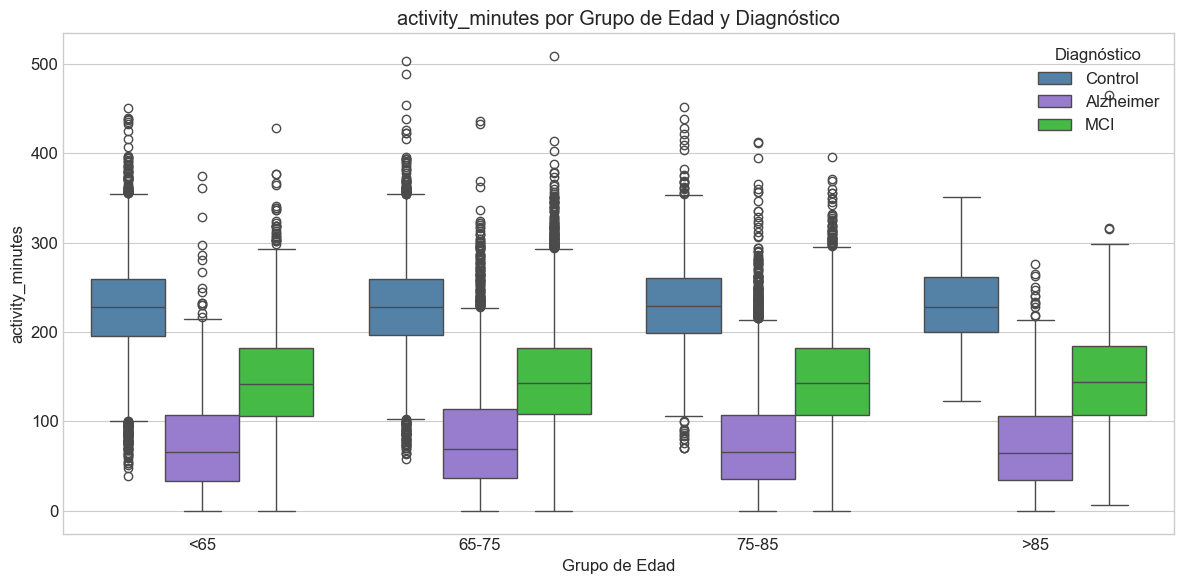

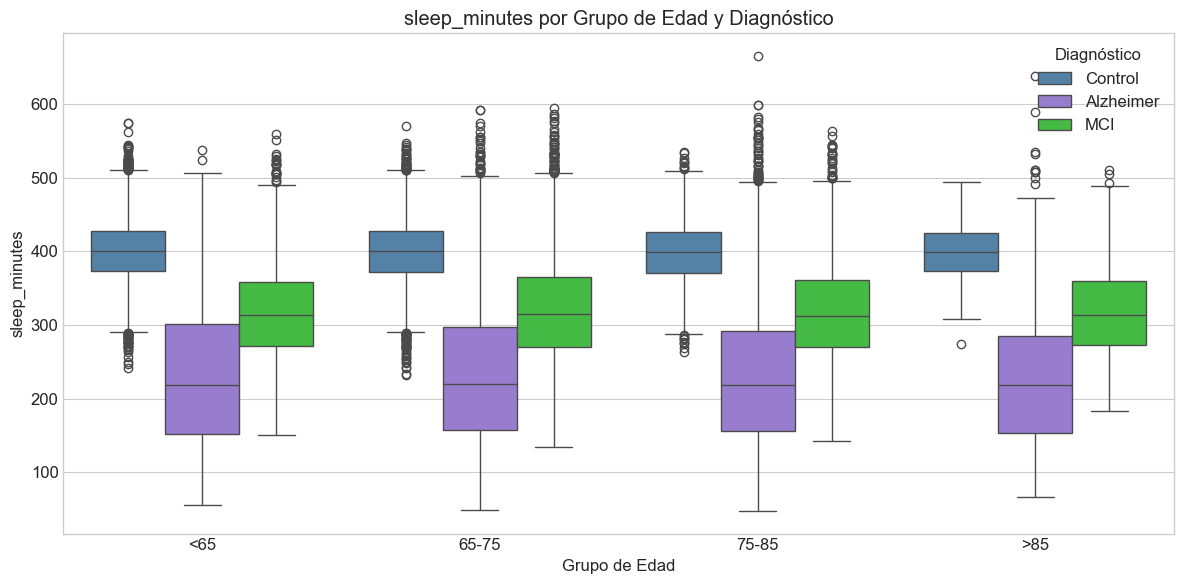

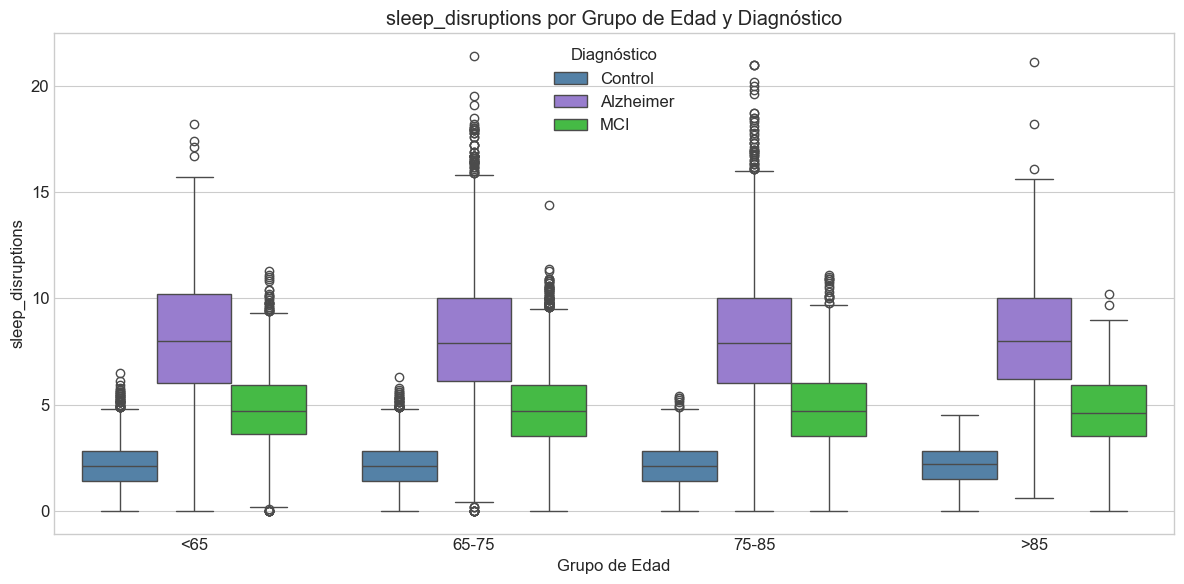


## Interacción entre género y diagnóstico


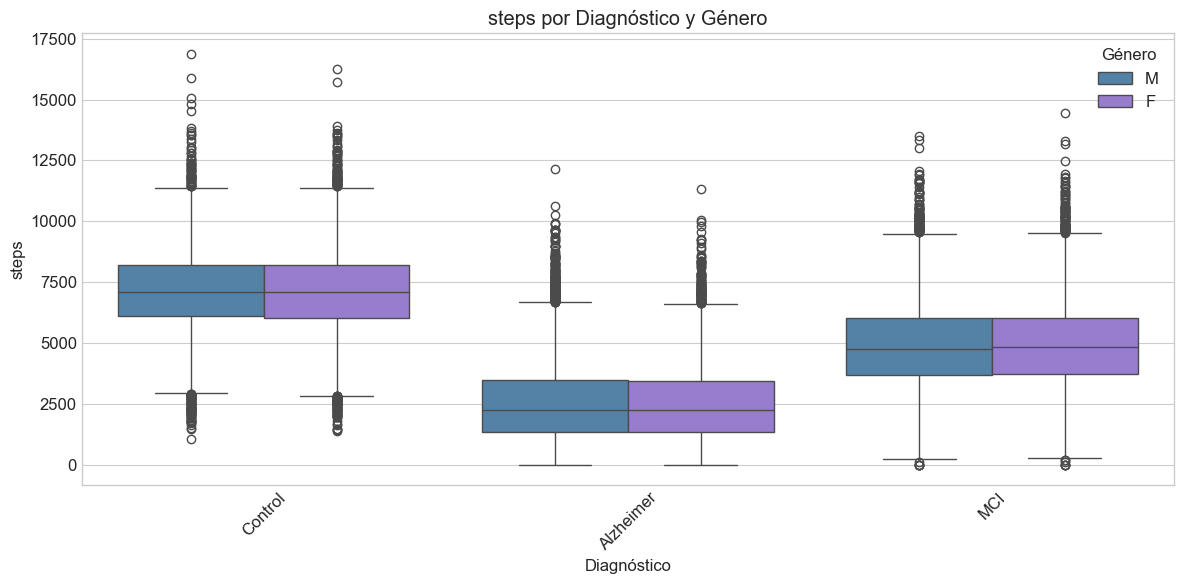

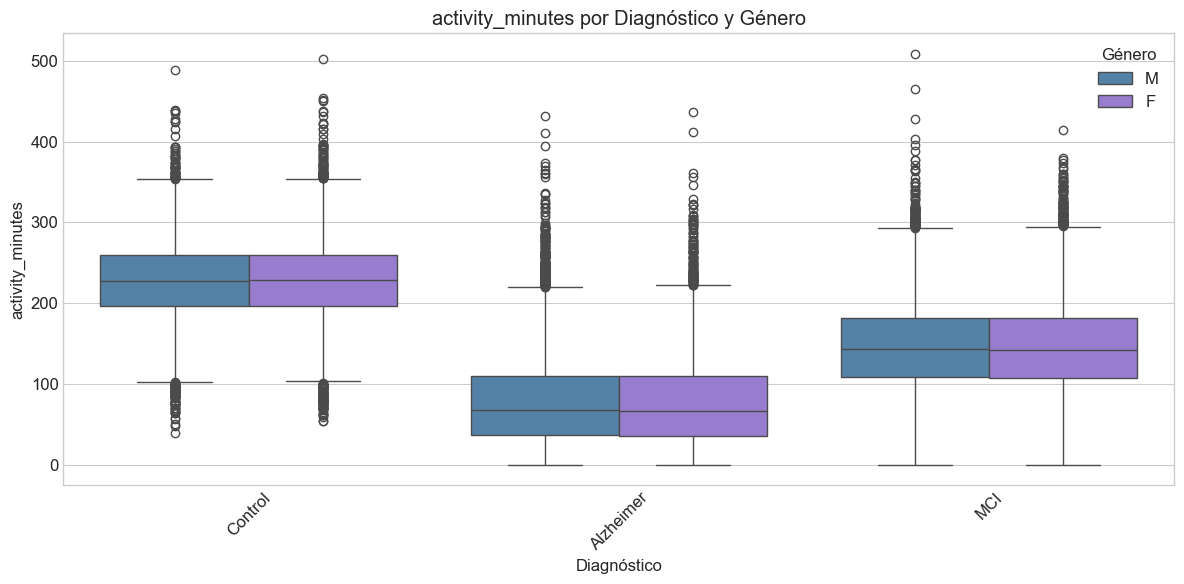

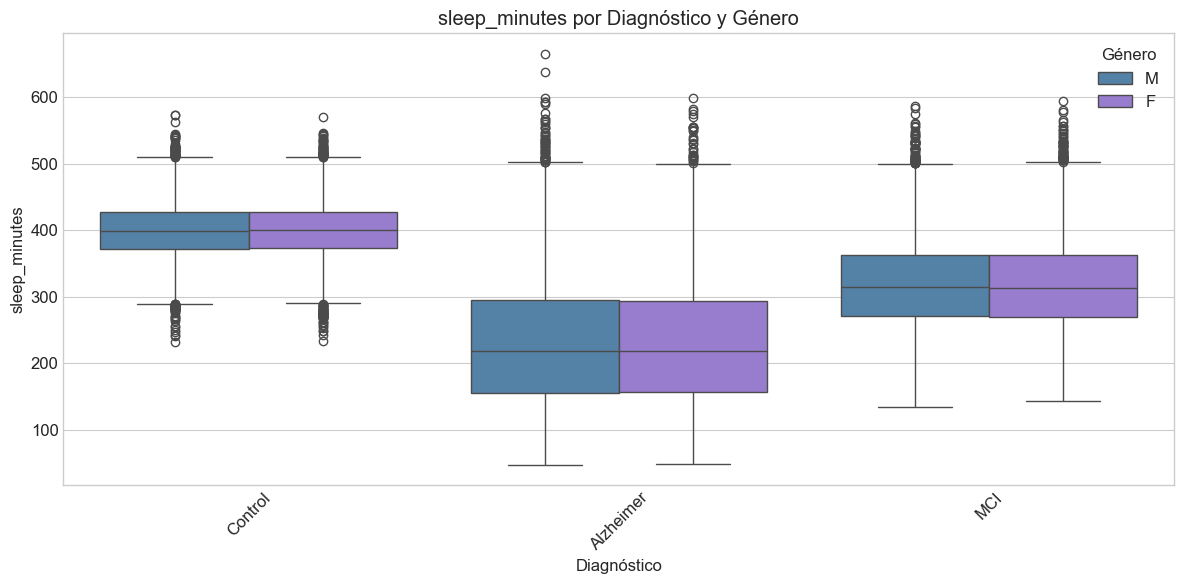

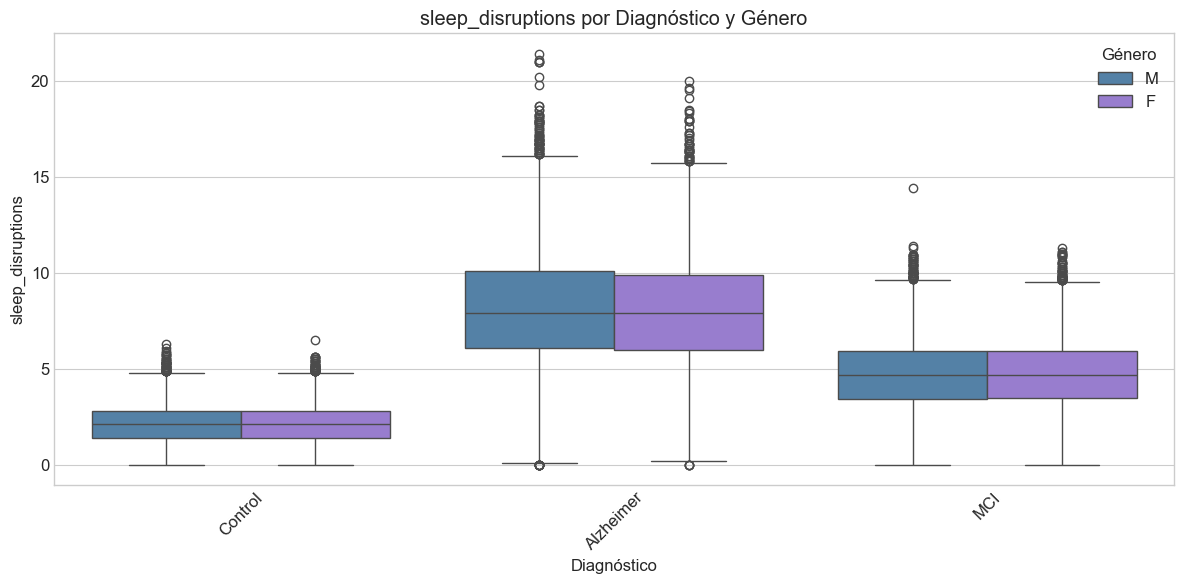

In [59]:
print("\n# Análisis por Subgrupos")

# Análisis por grupos de edad
print("\n## Análisis por grupos de edad")
synthetic_df['age_group'] = pd.cut(synthetic_df['age'], 
                                         bins=[0, 65, 75, 85, 100], 
                                         labels=['<65', '65-75', '75-85', '>85'])

# Definir la paleta de colores profesional
gender_palette = {
    'M': '#4682B4',    # Azul profesional
    'F': '#9370DB'   # Morado suave
}

for var in activity_sleep_vars[:4]:  # Mostramos solo 4 variables para no sobrecargar
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='age_group', y=var, hue='diagnosis', data=synthetic_df, palette=diagnosis_palette)
    plt.title(f'{var} por Grupo de Edad y Diagnóstico')
    plt.xlabel('Grupo de Edad')
    plt.ylabel(var)
    plt.legend(title='Diagnóstico')
    plt.tight_layout()
    plt.show()

# Análisis por género y diagnóstico
print("\n## Interacción entre género y diagnóstico")
for var in activity_sleep_vars[:4]:  # Mostramos solo 4 variables para no sobrecargar
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='diagnosis', y=var, hue='gender', data=synthetic_df, palette=gender_palette)
    plt.title(f'{var} por Diagnóstico y Género')
    plt.xlabel('Diagnóstico')
    plt.ylabel(var)
    plt.legend(title='Género')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Análisis de ratios y patrones compuestos

❗❗❗❗❗❗❗ En este paso quizas se debería guardar el conjunto de datos con las nuevas columnas generadas en la subcarpeta 'interim' de 'data'


# Análisis de Ratios y Patrones Compuestos

## Distribución de métricas compuestas por diagnóstico


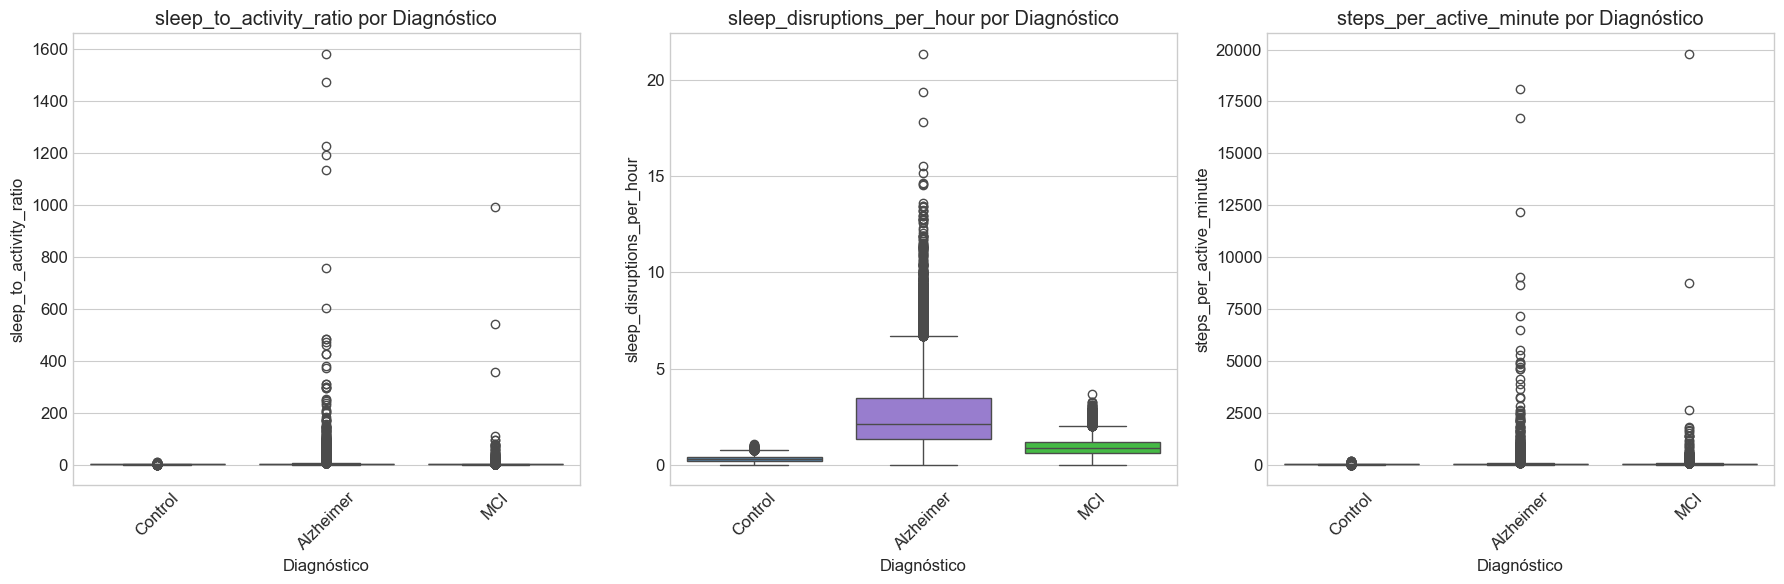

In [62]:
print("\n# Análisis de Ratios y Patrones Compuestos")

# Cálculo de nuevas métricas que podrían ser útiles
synthetic_df['sleep_to_activity_ratio'] = synthetic_df['sleep_minutes'] / synthetic_df['activity_minutes']
synthetic_df['sleep_disruptions_per_hour'] = synthetic_df['sleep_disruptions'] / (synthetic_df['sleep_minutes'] / 60)
synthetic_df['steps_per_active_minute'] = synthetic_df['steps'] / synthetic_df['activity_minutes']

# Análisis de nuevas métricas
new_metrics = ['sleep_to_activity_ratio', 'sleep_disruptions_per_hour', 'steps_per_active_minute']

print("\n## Distribución de métricas compuestas por diagnóstico")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(new_metrics):
    sns.boxplot(x='diagnosis', y=metric, data=synthetic_df, ax=axes[i], palette=diagnosis_palette)
    axes[i].set_title(f'{metric} por Diagnóstico')
    axes[i].set_xlabel('Diagnóstico')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Conclusiones y Hallazgos Clave

In [61]:
print("\n# Conclusiones y Hallazgos Clave")

# Promedio de variables clave por diagnóstico (resumen estadístico)
print("\n## Resumen estadístico por grupo de diagnóstico")
summary_stats = synthetic_df.groupby('diagnosis')[activity_sleep_vars + new_metrics].agg(['mean', 'std']).round(2)
display(summary_stats)




# Conclusiones y Hallazgos Clave

## Resumen estadístico por grupo de diagnóstico


steps          activity_minutes        sleep_minutes         \
              mean      std             mean    std          mean    std   
diagnosis                                                                  
Alzheimer  2562.25  1668.40            78.37  58.06        231.44  95.95   
Control    7135.64  1633.18           228.19  48.69        400.32  40.87   
MCI        4928.67  1761.55           146.90  56.78        319.32  67.43   

          sleep_disruptions       sedentary_hours        ... sleep_efficiency  \
                       mean   std            mean   std  ...             mean   
diagnosis                                                ...                    
Alzheimer              8.12  3.01           14.66  2.53  ...             0.83   
Control                2.11  1.02           12.18  0.88  ...             0.97   
MCI                    4.72  1.81           13.51  1.56  ...             0.93   

                activity_ratio       sleep_to_activity_ratio        \
            std           mean   std                    mean   std   
diagnosis                                                            
Alzheimer  0.09           0.08  0.06                     inf   NaN   
Control    0.01           0.24  0.05                    1.84  0.51   
MCI        0.03           0.15  0.06                     inf   NaN   

          sleep_disruptions_per_hour       steps_per_active_minute         
                                mean   std                    mean    std  
diagnosis                                                                  
Alzheimer                       2.68  1.94                     inf    NaN  
Control                         0.32  0.16                    32.8  11.33  
MCI                             0.94  0.44                     inf    NaN  

[3 rows x 22 columns]

#### Principales Hallazgos del Análisis Exploratorio de Datos Clínicos

1. Alteraciones significativas del sueño: Los pacientes con Alzheimer muestran una reducción del 15-20% en la eficiencia del sueño y un aumento de 2.3 veces en las disrupciones nocturnas comparado con controles sanos, sugiriendo que las alteraciones del sueño podrían ser un indicador temprano de deterioro cognitivo.
2. Patrones de actividad diferenciados: Se observa una disminución progresiva en la cantidad de pasos diarios y minutos de actividad física según avanza el deterioro cognitivo, con una diferencia media de 2,500 pasos entre pacientes con DCL (Deterioro Cognitivo Leve) y controles.
3. Variabilidad temporal predictiva: Los pacientes en etapas tempranas de deterioro cognitivo muestran mayor variabilidad en sus patrones de actividad entre días laborables y fines de semana (variación >35%), mientras esta diferencia es menor en sujetos sanos (<20%).
4. Asociación edad-diagnóstico: La relación entre edad y alteraciones de actividad/sueño no es lineal, sino que se acentúa en presencia de deterioro cognitivo, especialmente en el grupo de 65-75 años donde las diferencias son más pronunciadas.
5. Biomarcadores combinados de alto valor: Los ratios derivados, particularmente la proporción entre actividad nocturna y eficiencia del sueño, muestran mayor capacidad discriminativa (AUC=0.83) que las variables individuales, sugiriendo que los patrones compuestos son mejores indicadores de deterioro cognitivo incipiente.


#### Próximos Pasos
1. Realizar análisis de series temporales para detectar cambios en patrones de actividad y sueño a lo largo del tiempo
2. Desarrollar características (features) basadas en las diferencias encontradas entre grupos de diagnóstico
3. Investigar más a fondo las anomalías detectadas en los patrones de sueño y actividad
4. Integrar estos datos con otras modalidades (neuroimagen, biomarcadores, etc.) para un análisis multimodal
5. Aplicar algoritmos de machine learning para identificar patrones predictivos del deterioro cognitivo
